# 4x4ガイスターののナッシュ均衡戦略(all)
## 概要
駒数が合わせて5個以下

### 確定解析

双方に紫駒がない場合

- 1 自分の勝ち
- 0 千日手
- -1 相手の勝ち

という強解決が可能．
### 紫駒がある場合
プレイヤ1の立場から，目標とする平均利得を設定して

- 目標の平均利得を達成できるなら 1
- 相手の脱出を防げないなら　-1
- 結論が出ないなら 0

という解析をする．目標とする平均利得が0以下の場合は，結果が0ならば目標を達成できるのと同じことになる．

### 変数名やファイル名のnaming rule

- 後退解析の結果
 -値
　　- 確定値
　　  - det: 利得確定
　　 - 目標値
　　  - r1 : 平均利得1
　　  - r0: 平均利得0
　　  - r05: 平均利得0.5
　　  - r03: 平均利得 1/3
　　  - rm05: 平均利得 -0.5
　　  - rm03: 平均利得 -1/3
- 自駒と相手駒
 - {自駒}2{相手駒}
 - 確定駒はBR, 未確定駒はBRで表現
 - 確定駒の後に未確定駒を続ける．
 - 青と赤の順で並べる o br x rb
 - (例) Bbr_br 自分の確定駒は青，他に自駒2つと相手駒2つは紫駒
解析結果は results_{目標値}_{自駒と相手駒}_
これは，values_{目標値}_{自駒と相手駒}  と，counts_{目標値}_{自駒と相手駒}  のペア
これをpickle形式で出力して，'results_{目標値}_{自駒と相手駒}.picle'という名前のファイルとして保存する．

「すべての状態」は all_{自駒と相手駒}
後退解析のleafとなる関数は is_final_{自駒と相手駒}_{目標値}


# 必要なファイルをダウンロードする．

In [1]:
!mkdir ./data
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_det.pickle
# det2br
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_win_det2br.pickle
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_draw_det2br.pickle
# br2br
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_win_br2br.pickle
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_draw_br2br.pickle
# brr2br
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_draw_br2brr.pickle
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_draw_Rbr2br.pickle
# bbr2br
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_r03_bbr2br.pickle
!curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_rm05_br2bbr.pickle
# !curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_r05_Bbr2br.pickle
# !curl -L --output-dir ./data -O https://github.com/u-tokyo-gps-tanaka-lab/minigeister/raw/main/data/results_rm03_br2bbr.pickle



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  145M  100  145M    0     0  17.2M      0  0:00:08  0:00:08 --:--:-- 38.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17.2M  100 17.2M    0     0  5244k      0  0:00:03  0:00:03 --:--:-- 11.8M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 17.8M  100 17.8M    0     0  6356k      0  0:00:02  0:00:02 --:--:-- 15.3M
  % Total    % Received % Xferd  Average Speed   Tim

In [2]:
import sys
dir = "./data"
default_font = 'LiberationSans-Bold.ttf'


# 結果をファイルにsave/loadする．

In [3]:
import pickle
def save_result(x, filename):
    with open(filename, 'wb') as f:
        pickle.dump(x, f)
def load_result(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)




## 計算済の結果を諸々ロードする．

In [15]:
# [5駒以下の赤青確定]
results_det = load_result('data/results_det.pickle')
all_det =  list(results_det[0].keys())
# [3駒以下の赤青確定 vs 紫　2駒] 利得0を目標
results_draw_det2br = load_result(f'{dir}/results_draw_det2br.pickle')
all_det2br = list(results_draw_det2br[0].keys())
# [3駒以下の赤青確定 vs 紫　2駒] 利得1を目標
results_win_det2br = load_result(f'{dir}/results_win_det2br.pickle')
# [紫2駒 vs 紫2駒] 利得0を目標
results_draw_br2br = load_result(f'{dir}/results_draw_br2br.pickle')
all_br2br = list(results_draw_br2br[0].keys())
# [紫2駒 vs 紫2駒] 利得1を目標
results_win_br2br = load_result(f'{dir}/results_win_br2br.pickle')
# [赤1駒紫2駒 vs 紫2駒] 利得0を目標
results_draw_Rbr2br = load_result(f'{dir}/results_draw_Rbr2br.pickle')
# [紫2駒 vs 紫3駒(青1赤2)] 利得0を目標
results_draw_br2brr = load_result(f'{dir}/results_draw_br2brr.pickle')
# [紫3駒(青青赤) vs 紫2駒] 利得1/3を目標
results_r03_bbr2br = load_result(f'{dir}/results_r03_bbr2br.pickle')
# [紫3駒(青青赤) vs 紫2駒] 利得1/3を目標
results_r03_bbr2br = load_result(f'{dir}/results_r03_bbr2br.pickle')
# [紫2駒 vs 紫3駒(青青赤)] 利得-1/2を目標
results_rm05_br2bbr = load_result(f'{dir}/results_rm05_br2bbr.pickle')



In [66]:
results_rm05_br2bbr = load_result(f'{dir}/results_rm05_br2bbr.pickle')

# コマと盤面の表現
0 - 空マス
1 - 自分の青コマ
2 - 自分の赤コマ
3 - 自分の紫コマ
相手のコマは 負の値とする．
座標は　(x,y)のtupleで表現する．0<=x < W, 0 <= y < H, また，xは左から，yは左から数える(チェス流とは違う)．

next_statesでは，相手の赤駒，青駒が一つのときに，その駒を取る手は生成しない．

In [5]:
from itertools import combinations
from collections import defaultdict
from collections import Counter
# state = (turn, board)
# turn = 1 or -1
# board = (line1, line2, line3, line4)
# line_i = (col1, col2, col3, col4)
# col1 = 0, 1(my blue), 2 (my red), 3 (my purple), -1(opp blue), -2(opp red), -3(opp purple)
# returns (True or False, game value)

# board2tuple
def board2tuple(board):
    return tuple(tuple(l) for l in board)
# tuple2board
def tuple2board(tb):
    return list(list(l) for l in tb)
# flip the board vertically and change the turn.
def flip_vertical(state):
    turn, board = state
    H = len(state[1])
    altturn = -turn
    altboard = tuple(tuple(-v for v in board[y]) for y in range(H - 1, -1, -1))
    return (altturn, altboard)
# flip the board holizontally
def flip_horizontal(state):
    turn, board = state
    altboard = tuple(tuple(l[::-1]) for l in board)
    return (turn, altboard)
def normalize_state(state):
    fl = flip_horizontal(state)
    if fl < state:
        return fl
    return state
# neighbor of pos
def nextpos(pos, H, W):
    ans = []
    x, y = pos
    for dx, dy in [[1, 0], [0, 1], [-1, 0], [0, -1]]:
        x1, y1 = x + dx, y + dy
        if 0 <= x1 < W and 0 <= y1 < H:
            ans.append((x1, y1))
    return ans
# returns the pair of the piece position list, my pieces first and the opponent's pieces second
def get_pieces(board):
    H, W = len(board), len(board[0])
    mypieces = [(x, y) for y in range(H) for x in range(W) if board[y][x] > 0]
    oppieces = [(x, y) for y in range(H) for x in range(W) if board[y][x] < 0]
    return mypieces, oppieces
# piece counts
def get_pcounts(board):
    return Counter(v for l in board for v in l)
# Returns the successive states of the given state without capturing moves are applied.
# 相手の紫駒は取らない．赤駒，青駒が複数ある時は取る手を生成する．
def next_states(state):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = get_pcounts(board)
    ans = []
    if turn == 1:
        for p in mypieces:
            pcolor = board[p[1]][p[0]]
            ps = nextpos(p, H, W)
            for pos in ps:
                color = board[pos[1]][pos[0]]
                if color == 0 or (color in (-1, -2) and pcounts[color] > 1) :
                    board1 = tuple2board(board)
                    board1[p[1]][p[0]] = 0
                    board1[pos[1]][pos[0]] = pcolor
                    ans.append((-turn, board2tuple(board1)))
    else:
        for p in oppieces:
            pcolor = board[p[1]][p[0]]
            ps = nextpos(p, H, W)
            for pos in ps:
                color = board[pos[1]][pos[0]]
                if color == 0 or (color in (1, 2) and pcounts[color] > 1) : # don't make capture moves
                    board1 = tuple2board(board)
                    board1[p[1]][p[0]] = 0
                    board1[pos[1]][pos[0]] = pcolor
                    ans.append((-turn, board2tuple(board1)))
    return ans
# 表示
from PIL import Image, ImageDraw, ImageFont
def stateimg(state):
    H, W = len(state[1]), len(state[1][0])
    turn, board = state
    grid = 40
    offset = 20
    im = Image.new("RGB", (grid * W + 90, grid * H + 90))
    draw = ImageDraw.Draw(im)
    draw.rectangle([(0,0),(grid * W + 90, grid * H + 90)],fill=(255,255,255))
    fnt = ImageFont.truetype(default_font)
    #fnt = ImageFont.truetype("LiberationSans-Bold.ttf",25)
    for y in range(H + 1):
        draw.line([(offset, offset + y * grid), (offset + W * grid, offset + y * grid)],fill=(0,0,0),width=3)
    for x in range(W + 1):
        draw.line([(offset + x * grid, offset), (offset + x * grid, offset + H * grid)],fill=(0,0,0),width=3)
    for x in range(W):
        draw.text((offset + (x + 0.4)*grid , offset + (H + 0.01) * grid),chr(ord('a') + x), font=fnt,fill=(0,0,0))
    for y in range(H):
        draw.text((offset - 0.4*grid , offset + (y + 0.2) * grid),str(H - y), font=fnt,fill=(0,0,0))
    for y in range(H):
        for x in range(W):
            p = board[y][x]
            color = (255, 0, 255)
            if abs(p) == 2:
                color = (255, 0, 0)
            elif abs(p) == 1:
                color = (0, 0, 255)
            cx, cy = (offset + grid * (x * 2 + 1) // 2, offset + grid * (y * 2 + 1) // 2)
            g4 = grid // 4
            r = grid // 16
            if p > 0:
                #draw.polygon([(cx, cy - g4),(cx - g4, cy + g4), (cx + g4, cy + g4)], outline=(0,0,0))
                #draw.ellipse((cx - r, cy, cx + r, cy + 2 * r),fill=color)
                draw.polygon([(cx, cy - g4),(cx - g4, cy + g4), (cx + g4, cy + g4)], outline=(0,0,0),fill=color)

            elif p < 0:
                #draw.polygon([(cx, cy + g4),(cx - g4, cy - g4), (cx + g4, cy - g4)], outline=(0,0,0))
                #draw.ellipse((cx - r, cy - 2 * r, cx + r, cy),fill=color)
                draw.polygon([(cx, cy + g4),(cx - g4, cy - g4), (cx + g4, cy - g4)], outline=(0,0,0),fill=color)
    turnx, turny = grid * W + offset * 2, int(grid * 0.5 + offset)
    if turn > 0:
        turny = int(grid * (H - 0.5)+ offset)
    r = 10
    draw.ellipse((turnx - r, turny - r, turnx + r, turny + r),fill=(0, 0, 0))
    return im

def showstate(state, filename=None):
    #rstate = flip_vertical(state)
    #print(f'(canwin, candraw)[{state}]={(canwin[state], candraw[state])}')
    #print(f'(canwin, candraw)[{rstate}]={(canwin[rstate], candraw[rstate])}')
    img =  stateimg(state)
    if filename:
        img.save(filename)
    return img
# 複数のimageを縦に並べて表示してみる．
from PIL import Image
def show_images_hv(images, w, filename=None, showarrow=True):
    width = images[0].width
    height = images[0].height
    for im in images:
        assert im.width == width and im.height == height
    allwidth = width * w
    n = len(images)
    h = (n + w - 1) // w
    ans = Image.new('RGB', (w * width, h * height))
    draw = ImageDraw.Draw(ans)
    draw.rectangle([(0,0),(w * width, h * height)],fill=(255,255,255))
    #fnt = ImageFont.truetype("LiberationSans-Bold.ttf",25)
    fnt = ImageFont.truetype(default_font,25)
    x, y = 0, 0
    for i, im in enumerate(images):
        ans.paste(im, (x, y))
        if showarrow and i != n - 1:
            draw = ImageDraw.Draw(ans)
            draw.text((x + width * 0.9 , y + height * 0.35),">", font=fnt,fill=(0,0,0))
        x += width
        if x >= w * width:
            x = 0
            y += height
    if filename:
        ans.save(filename)
    return ans
def showstates(states, w=5, filename=None, showarrow=True):
    images = [showstate(s) for s in states]
    return show_images_hv(images, w, filename, showarrow)
# 汎用の後退解析
# retrogrady analysis
# returns a pair of dictionaries
#    (state -> value, state -> count)
# value 1 : can draw
# value -1 : can't draw (including lose)
from collections import deque
def rga(all_states, final_values):
    all_states_set = set(all_states)
    values, counts = {}, {}
    rg = defaultdict(list)
    gcount = defaultdict(int)
    q = deque()
    rq = deque()
    for s in all_states:
        v = final_values[s]
        values[s] = v
        if v == 0:
            #counts[s] = 0
            for nxt in next_states(s):
                assert nxt in all_states_set
                gcount[s] += 1
                rg[nxt].append(s)
        elif v == 1:
            q.append(s)
            counts[s] = 1
        elif v == -1:
            rq.append(s)
            counts[s] = 1
    i = 0
    while len(q) > 0 or len(rq) > 0:
        if len(q) > 0:
            s = q.popleft()
            values[s] = 1
            if s[0] == 1: # my turn
                for prev in rg[s]:
                    gcount[prev] -= 1
                    if gcount[prev] == 0:
                        q.append(prev)
                        counts[prev] = counts[s] + 1
            else: # op turn
                for prev in rg[s]:
                    if prev not in counts:
                        gcount[prev] = 0
                        q.append(prev)
                        counts[prev] = counts[s] + 1
        if len(rq) > 0:
            s = rq.popleft()
            values[s] = -1
            if s[0] == -1: # op turn
                for prev in rg[s]:
                    gcount[prev] -= 1
                    if gcount[prev] == 0:
                        rq.append(prev)
                        counts[prev] = counts[s] + 1
            else: # my turn
                for prev in rg[s]:
                    if prev not in counts:
                        gcount[prev] = 0
                        rq.append(prev)
                        counts[prev] = counts[s] + 1
    return (values, counts)

# values, countsのresultsをmergeする．
def merge_results(results1, results2):
    values = {s: v for s, v in results1[0].items()}
    counts = {s: v for s, v in results1[1].items()}
    for s, v in results2[0].items():
        values[s] = v
    for s, v in results2[1].items():
        counts[s] = v
    return (values, counts)

from itertools import permutations
# すべての局面を生成する
def states_from_combination(H, W, mycolorscomb=((1,2),(3,3)), opcolorscomb=((-1,-2),(-3,-3)),plimit=5):
    all_states = set()
    mycolorsperm = set(perm for comb in mycolorscomb for perm in permutations(comb))
    opcolorsperm = set(perm for comb in opcolorscomb for perm in permutations(comb))
    for turn in (-1, 1):
        for mycolors in mycolorsperm:
            myn = len(mycolors)
            for myp in combinations(range(H * W), myn):
                rest = list(sorted(set(range(H * W)) - set(myp)))
                for opcolors in opcolorsperm:
                    opn = len(opcolors)
                    if myn + opn > plimit:
                        continue
                    for opp in combinations(rest, opn):
                        board = [[0] * W for _ in range(H)]
                        for i, c in zip(myp, mycolors):
                            board[i // W][i % W] = c
                        for i, c in zip(opp, opcolors):
                            board[i // W][i % W] = c
                        board = tuple(tuple(l) for l in board)
                        all_states.add((turn, board))
    return list(all_states)
def state_diff(s1, s2):
    myp1, opp1 = get_pieces(s1[1])
    myp2, opp2 = get_pieces(s2[1])
    ans = 0
    for p1, p2 in zip(myp1, myp2):
        ans += abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])
    for p1, p2 in zip(opp1, opp2):
        ans += abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])
    return ans

def one_seq_draw(s, tab):
    init_s = s
    init_turn = s[0]
    visited = set()
    ans = []
    while True:
        visited.add(s)
        ans.append(s)
        ps = next_states(s)
        maxdist = 0
        maxpos = None
        for pos in ps:
            if tab[0][pos] != 0 or pos in visited:
                continue
            dist = state_diff(init_s, pos)
            if dist > maxdist:
                maxdist = dist
                maxpos = pos
        if maxdist == 0:
            break
        s = maxpos
    return ans
# s から初めて，同じvalueでcountsが1つ少ない状態までのsequence
def one_seq(s, tab):
    values, counts = tab
    images = []
    ans = [s]
    v = values[s]
    if v == 0:
        return one_seq_draw(s, tab)
    c = counts[s]
    while counts[s] > 0:
        #print(f's={s}')
        images.append(showstate(s))
        ps = next_states(s)
        npos = None
        #for pos in ps:
        #    print(f'pos={pos}, values[pos]={values[pos]}, counts[pos] = {counts[pos]}')
        for pos in ps:
            if values[pos] == v and counts[pos] == c - 1:
                npos = pos
                c -= 1
                break
        if npos is None:
            #rint('loop')
            break
        s = npos
        ans.append(s)
    return ans

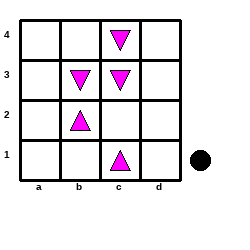

In [6]:
# @title 2 vs 2以外の駒数での表示の確認
state = (1, ((0, 0, -3, 0), (0, -3, -3, 0), (0, 3, 0, 0), (0, 0, 3, 0)))
showstate(state)

# 駒の色が既知としてplayして勝てる時に勝つ戦略
この観点での自分の(手番のプレイヤのではなく)勝ち局面は
- 自分の手番
 - 自分の青駒が脱出ポイントにいる．
 - 自分の駒が相手の唯一の青駒を取れる
 - 自分の駒が相手の青駒(複数枚のうちの一つ)を取った局面が勝ち局面になっている．

負け局面は

- 相手の手番
 - 相手の青駒が脱出ポイントにいる．
 - 相手の駒が自分の唯一の青駒を取れる
 - 相手の駒が自分の青駒(複数枚のうちの一つ)を取った局面が負けち局面になっている．


In [17]:
# @title is_final_det
from collections import Counter
# is_final_det
# values_m1 - value table of states whose pieces are less than the original.
# return value
# 1 : the state is final and player 1 can win
# -1 : the state is final and player 2 can win
# 0 : the state is not final
def is_final_det(state):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces =get_pieces(board)
    pcounts = get_pcounts(board)
    if turn == 1:
        if board[0][0] == 1 or board[0][W - 1] == 1: # 脱出できるなら勝ち
            return 1
        for myp in mypieces:
            for p in nextpos(myp, H, W):
                v = board[p[1]][p[0]]
                if v == -1:
                    if pcounts[-1] == 1: # 相手の唯一の青駒を取るのは勝ち
                        return 1
                    newboard = tuple2board(board)
                    newboard[p[1]][p[0]] = board[myp[1]][myp[0]]
                    newboard[myp[1]][myp[0]] = 0
                    newstate = (-turn, board2tuple(newboard))
        return 0
    else:
        if board[H - 1][0] == -1 or board[H - 1][W - 1] == -1: # 相手番で脱出できるようなら負け
            return -1
        for opp in oppieces:
            for p in nextpos(opp,H,W):
                v = board[p[1]][p[0]]
                if v == 1:
                    if pcounts[1] == 1: # 相手の唯一の青駒を取るのは勝ち
                        return -1
                    newboard = tuple2board(board)
                    newboard[p[1]][p[0]] = board[opp[1]][opp[0]]
                    newboard[opp[1]][opp[0]] = 0
                    newstate = (-turn, board2tuple(board))
    return 0

In [8]:
# @title 後退解析の実行
all_det = states_from_combination(4, 4, mycolorscomb=((1,2), (1,1,2),(1,2,2)),
                                  opcolorscomb=((-1, -2),(-1, -1, -2), (-1, -2, -2)),plimit=5)

results_det = rga(all_det, {s: is_final_det(s) for s in all_det})
save_result(results_det, f'{dir}/results_det.pickle')

## いくつかの結果の確認

0


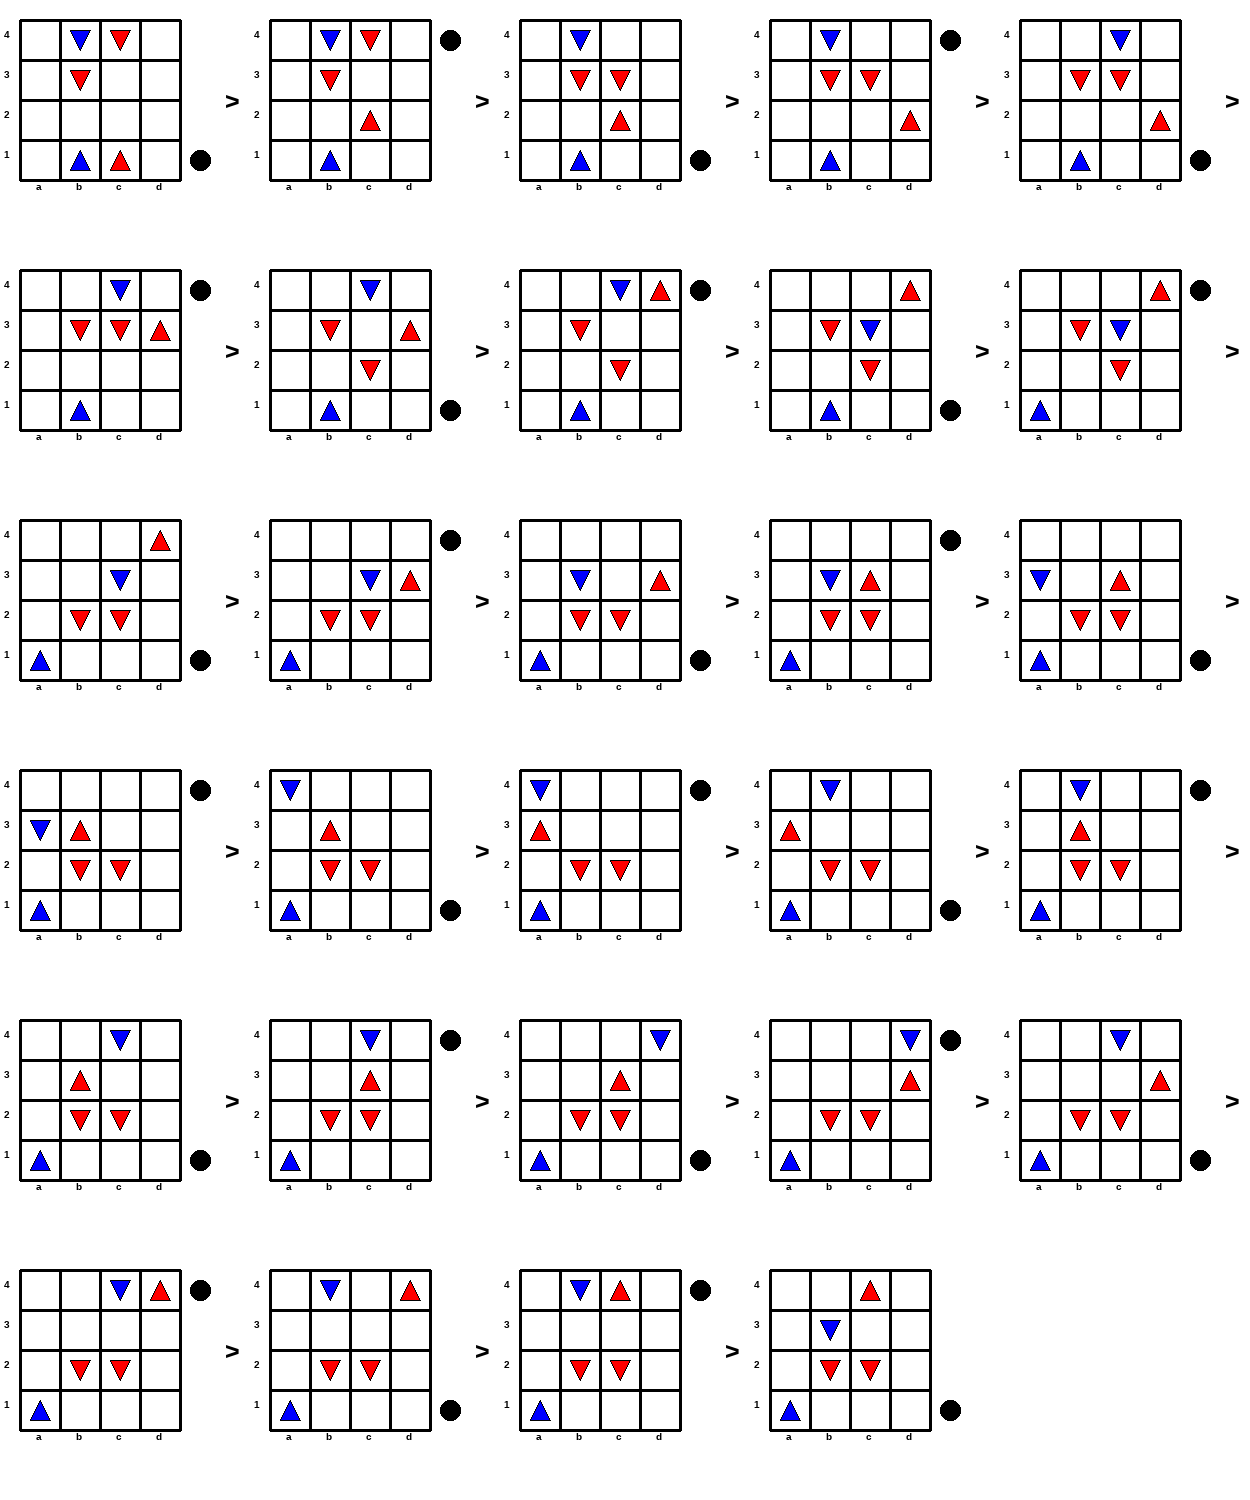

In [16]:
# @title BR vs BRR で千日手になる配置
s = ((1, ((0, -1, -2, 0), (0, -2, 0, 0), (0, 0, 0, 0), (0, 1, 2, 0))))
print(results_det[0][s])
showstates(one_seq(s, results_det))

-1
[(1, ((0, -1, -2, 0), (0, -1, 0, 0), (0, 0, 0, 0), (0, 1, 2, 0))), (-1, ((0, -1, -2, 0), (0, -1, 0, 0), (0, 0, 0, 0), (1, 0, 2, 0))), (1, ((-1, 0, -2, 0), (0, -1, 0, 0), (0, 0, 0, 0), (1, 0, 2, 0))), (-1, ((-1, 0, -2, 0), (0, -1, 0, 0), (0, 0, 0, 0), (1, 2, 0, 0))), (1, ((0, 0, -2, 0), (-1, -1, 0, 0), (0, 0, 0, 0), (1, 2, 0, 0))), (-1, ((0, 0, -2, 0), (-1, -1, 0, 0), (0, 2, 0, 0), (1, 0, 0, 0))), (1, ((0, 0, -2, 0), (-1, 0, -1, 0), (0, 2, 0, 0), (1, 0, 0, 0))), (-1, ((0, 0, -2, 0), (-1, 0, -1, 0), (0, 0, 2, 0), (1, 0, 0, 0))), (1, ((0, -2, 0, 0), (-1, 0, -1, 0), (0, 0, 2, 0), (1, 0, 0, 0))), (-1, ((0, -2, 0, 0), (-1, 0, -1, 0), (0, 2, 0, 0), (1, 0, 0, 0))), (1, ((0, 0, 0, 0), (-1, -2, -1, 0), (0, 2, 0, 0), (1, 0, 0, 0))), (-1, ((0, 0, 0, 0), (-1, -2, -1, 0), (0, 2, 0, 0), (0, 1, 0, 0))), (1, ((0, 0, 0, 0), (-1, -2, 0, -1), (0, 2, 0, 0), (0, 1, 0, 0))), (-1, ((0, 0, 0, 0), (-1, -2, 0, -1), (0, 0, 2, 0), (0, 1, 0, 0))), (1, ((0, 0, 0, 0), (0, -2, 0, -1), (-1, 0, 2, 0), (0, 1, 0, 0))),

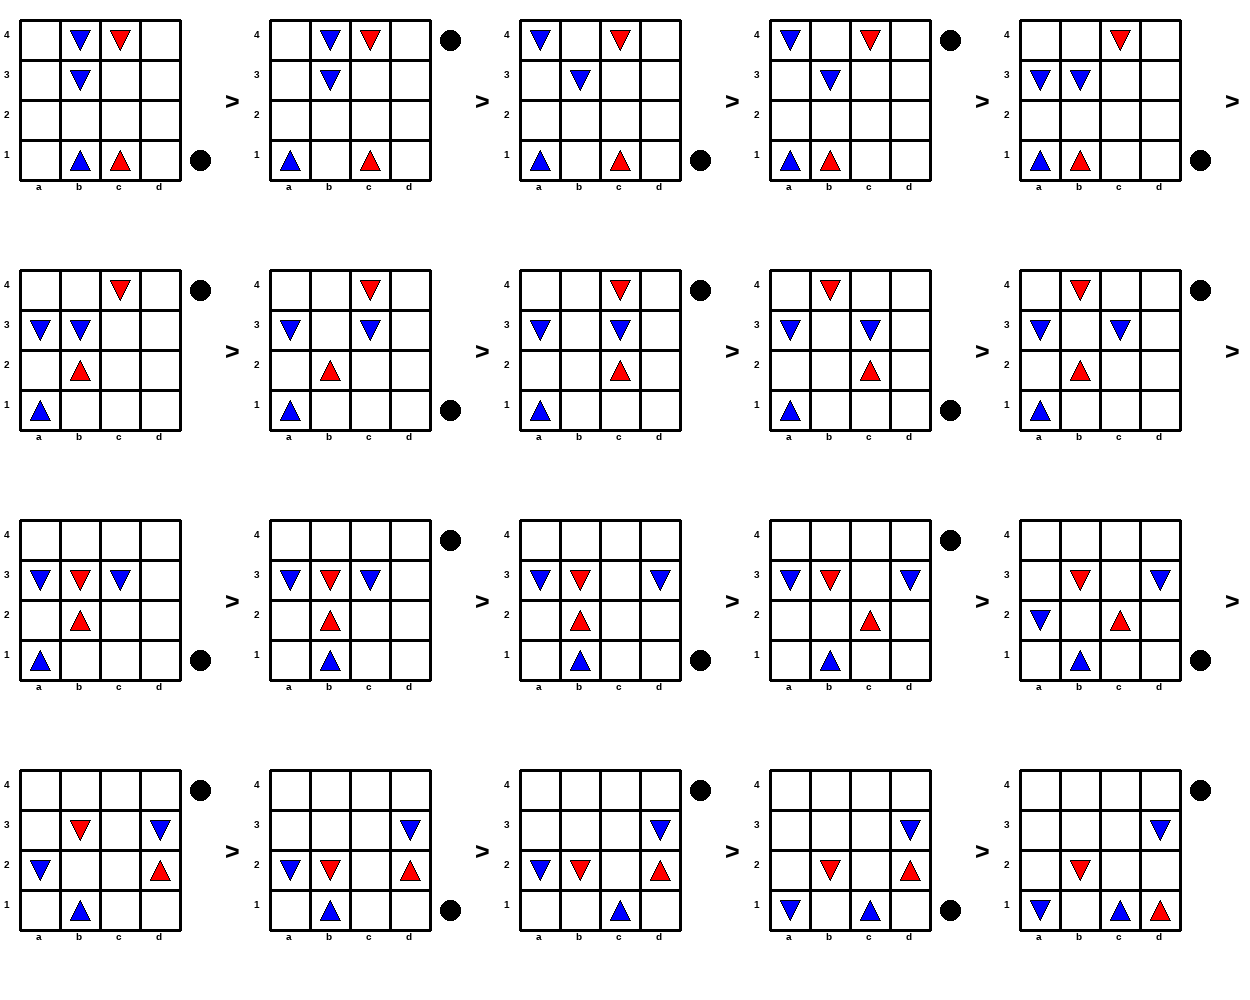

In [12]:
# @title　BR 対　BBR で千日手にできない配置
s = ((1, ((0, -1, -2, 0), (0, -1, 0, 0), (0, 0, 0, 0), (0, 1, 2, 0))))
print(results_det[0][s])
states = one_seq(s, results_det)
print(states)
showstates(states)

# 自分の駒が既知，相手が紫駒2個でplayして利得1となる戦略
この観点での自分の(手番のプレイヤのではなく)勝ち局面は
- 自分の手番
 - 自分の青駒が脱出ポイントにいる．

負け局面は
- 相手の手番
 - 相手の青駒が脱出ポイントにいる．
 - 相手の駒が自分の唯一の青駒を取れる．

In [18]:
# @title is_final_win_det2br
# return value
# return value
# 1 : the state is final and player 1 can win
# -1 : the state is final and player 2 can win
# 0 : the state is not final
from collections import Counter
def is_final_win_det2br(state):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = get_pcounts(board)
    #print(f'mypieces={mypieces}, oppieces={oppieces}')
    assert len(oppieces) == 2, f'is_det_final can applicable to only 2x2 games'
    assert pcounts[-3] == 2
    if turn == 1:
        if board[0][0] == 1 or board[0][W - 1] == 1: # can escape
            return 1
    else:
        if board[H - 1][0] == -3 or board[H - 1][W - 1]== -3: # 相手番で脱出できるようなら負け
            return -1
        for opp in oppieces:
            for p in nextpos(opp,H,W):
                v = board[p[1]][p[0]]
                if v == 1:
                    if pcounts[1] == 1: # 自分の唯一の青駒を取られるのは負け
                        return -1
    return 0

In [ ]:
all_det2br = states_from_combination(4, 4, mycolorscomb=((1,2),(1,1,2),(1,2,2)), opcolorscomb=((-3, -3),))
results_win_det2br = rga(all_det2br, {s: is_final_win_det2br(s) for s in all_det2br})
save_result(results_win_det2br, f'{dir}/results_win_det2br.pickle')


# いくつかの結果の確認

-1


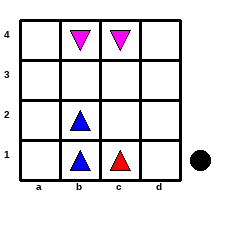

In [19]:
# @title BBR vs br で勝てない配置
s = ((1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 1, 0, 0), (0, 1, 2, 0))))
print(results_win_det2br[0][s])
showstate(s)

1


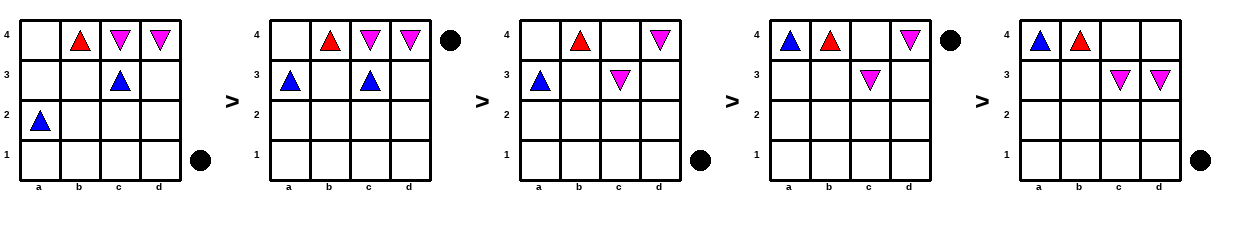

In [20]:
# @title BBR vs br で勝てる配置
s = (1, ((0, 2, -3, -3), (0, 0, 1, 0), (1, 0, 0, 0), (0, 0, 0, 0)))
print(results_win_det2br[0][s])
# showstate(s)
states = one_seq(s, results_win_det2br)
showstates(states)

-1


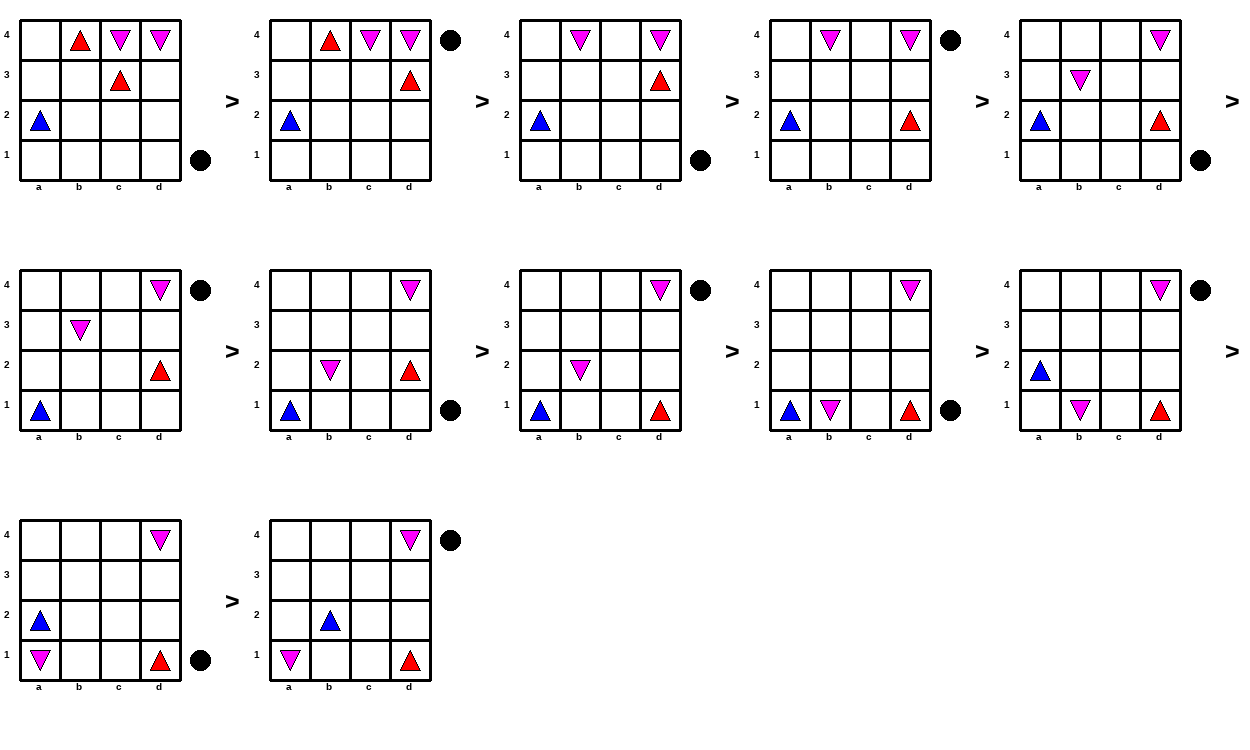

In [21]:
# @title BRR vs br で勝てない配置
s = (1, ((0, 2, -3, -3), (0, 0, 2, 0), (1, 0, 0, 0), (0, 0, 0, 0)))
print(results_win_det2br[0][s])
# showstate(s)
states = one_seq(s, results_win_det2br)
showstates(states)

1
[(1, ((0, 0, 0, 0), (2, 0, 0, 1), (0, -3, -3, 0), (0, 0, 0, 0))), (-1, ((0, 0, 0, 1), (2, 0, 0, 0), (0, -3, -3, 0), (0, 0, 0, 0))), (1, ((0, 0, 0, 1), (2, 0, 0, 0), (0, 0, -3, 0), (0, -3, 0, 0)))]


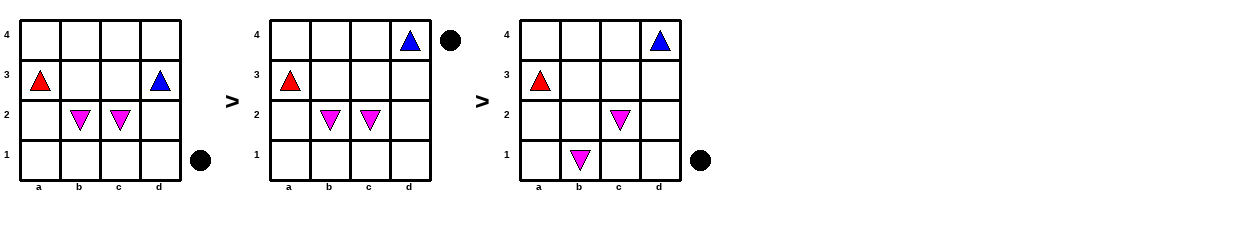

In [22]:
# @title BR vs br で勝てる配置
s = (1, ((0, 0, 0, 0), (2, 0, 0, 1), (0, -3, -3, 0), (0, 0, 0, 0)))
print(results_win_det2br[0][s])
states = one_seq(s, results_win_det2br)
print(states)
showstates(states)

# det対brでdrawを目指す
自分の駒は 3個以下 (BR, BBR, BRR)
この観点での自分の(手番のプレイヤのではなく)勝ち局面は
- 自分の手番
 - 自分の青駒が脱出ポイントにいる．
 - 相手の駒が青赤，赤青のどちらかと決めると，どちらも勝ち局面
    
負け局面は
- 相手の手番
 - 相手の紫駒が脱出ポイントにいる．
 - 相手が自分の唯一の青駒を取れる


In [ ]:
# @title is_final_draw_det2br
# return value
# 1 : the state is final and player 1 can draw
# -1 : the state is final and player 1 can't draw
# 0 : the state is not final
from collections import Counter
from itertools import permutations
def is_final_draw_det2br(state, results_det):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = get_pcounts(board)
    assert len(mypieces) in (2, 3) and len(oppieces) == 2
    assert pcounts[-3] == 2 and pcounts[3] == 0
    if turn == 1:
        if board[0][0] == 1 or board[0][W - 1] == 1: # can escape
            return 1
        for opps in permutations(oppieces):
            newboard = [list(row) for row in board]
            newboard[opps[0][1]][opps[0][0]] = -1
            newboard[opps[1][1]][opps[1][0]] = -2
            newstate =  (turn, board2tuple(newboard))
            if results_det[0][newstate] != 1:
                return 0
        return 1
    else:
        if board[H - 1][0] == -3 or board[H - 1][W - 1]== -3: # 相手番で脱出できるようなら負け
            return -1
        if pcounts[1] == 1:
            for opp in oppieces:
                for p in nextpos(opp, H, W):
                    if board[p[1]][p[0]] == 1: # can capture my blue
                        return -1
    return 0

In [ ]:
all_det2br = states_from_combination(4, 4, mycolorscomb=((1,2),(1,1,2),(1,2,2)), opcolorscomb=((-3, -3),))
results_draw_det2br = rga(all_det2br, {s: is_final_draw_det2br(s, results_det) for s in all_det2br})
save_result(results_draw_det2br, f'{dir}/results_draw_det2br.pickle')


## 結果の確認

0
[(1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 1, 2, 0))), (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 2, 0), (0, 1, 0, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 2, 0), (0, 1, 0, 0))), (-1, ((0, 0, -3, 0), (0, -3, 2, 0), (0, 0, 0, 0), (0, 1, 0, 0))), (1, ((0, 0, 0, -3), (0, -3, 2, 0), (0, 0, 0, 0), (0, 1, 0, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 2), (0, 0, 0, 0), (0, 1, 0, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 2), (0, 0, 0, 0), (0, 1, 0, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 2), (0, 0, 0, 0), (1, 0, 0, 0))), (1, ((0, 0, -3, 0), (0, 0, 0, 2), (0, -3, 0, 0), (1, 0, 0, 0))), (-1, ((0, 0, -3, 0), (0, 0, 2, 0), (0, -3, 0, 0), (1, 0, 0, 0))), (1, ((0, 0, 0, -3), (0, 0, 2, 0), (0, -3, 0, 0), (1, 0, 0, 0))), (-1, ((0, 0, 0, -3), (0, 0, 0, 2), (0, -3, 0, 0), (1, 0, 0, 0)))]


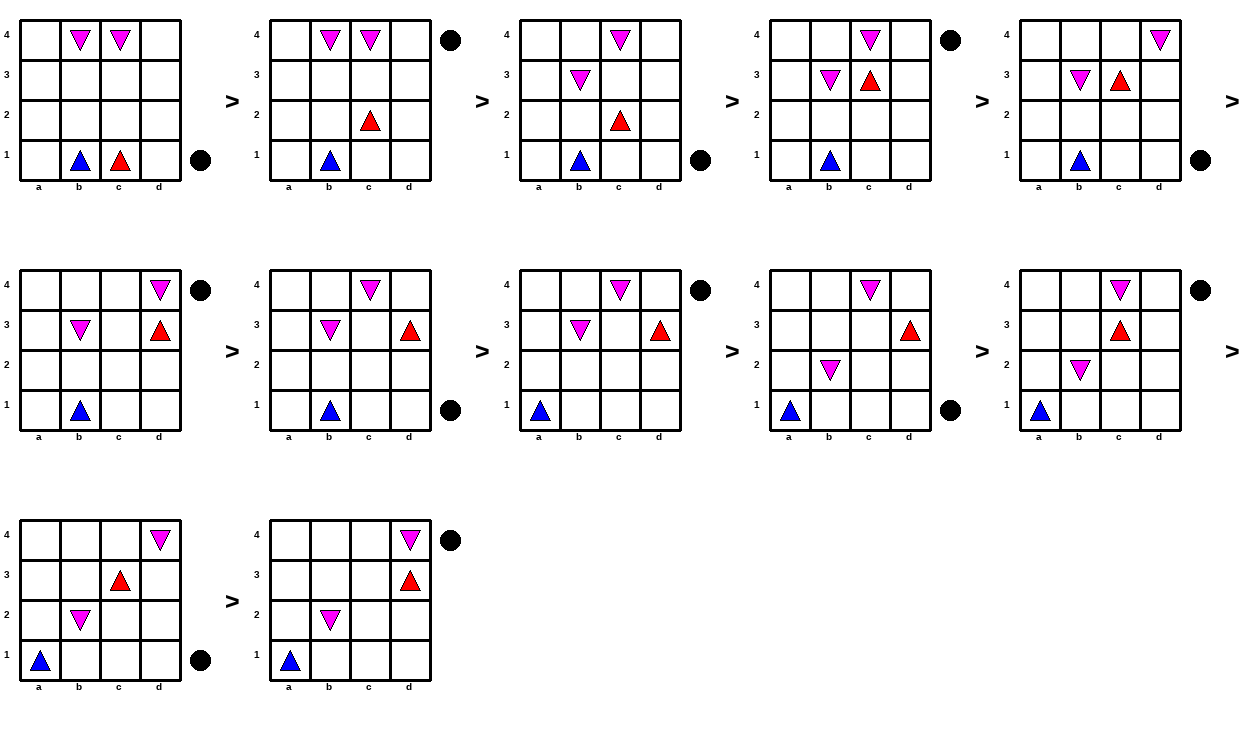

In [23]:
# @title
s = (1,((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 1, 2, 0)))
print(results_draw_det2br[0][s])
states = one_seq(s, results_draw_det2br)
print(states)
showstates(states)

-1
[(-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 1, 2, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (0, 1, 2, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (1, 0, 2, 0))), (1, ((0, 0, -3, 0), (0, 0, 0, 0), (0, -3, 0, 0), (1, 0, 2, 0))), (-1, ((0, 0, -3, 0), (0, 0, 0, 0), (0, -3, 0, 0), (1, 0, 0, 2))), (1, ((0, 0, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (1, -3, 0, 2))), (-1, ((0, 0, -3, 0), (0, 0, 0, 0), (1, 0, 0, 0), (0, -3, 0, 2))), (1, ((0, 0, -3, 0), (0, 0, 0, 0), (1, 0, 0, 0), (-3, 0, 0, 2))), (-1, ((0, 0, -3, 0), (0, 0, 0, 0), (0, 1, 0, 0), (-3, 0, 0, 2)))]


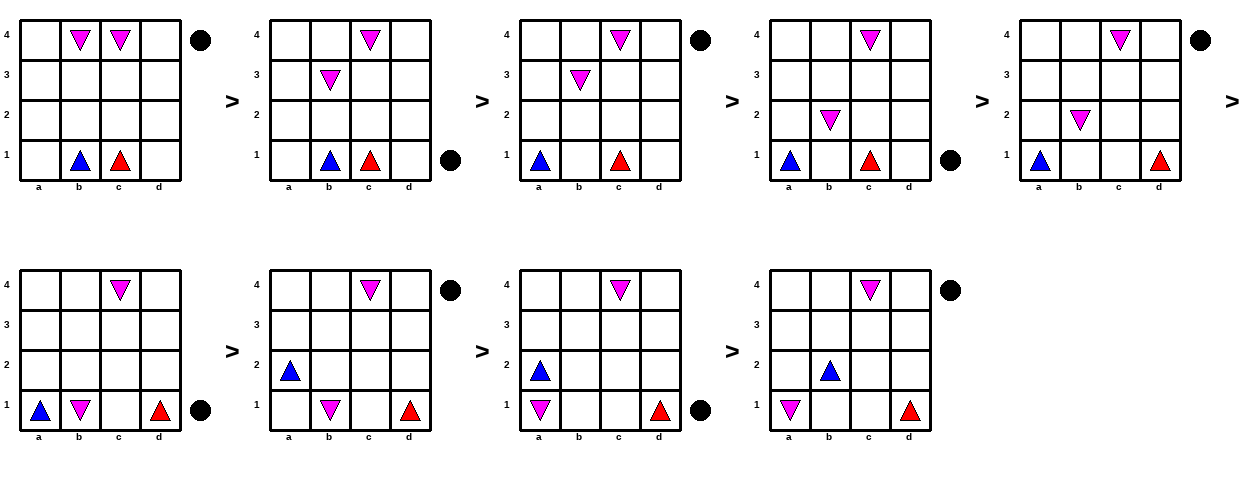

In [24]:
# @title 手番を変更するとdrawを実現できない
s = (-1,((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 1, 2, 0)))
print(results_draw_det2br[0][s])
states = one_seq(s, results_draw_det2br)
print(states)
showstates(states)

-1
[(1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 1, 2, 0))), (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 2, 0), (0, 1, 2, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 2, 0), (0, 1, 2, 0))), (-1, ((0, 0, -3, 0), (0, -3, 2, 0), (0, 0, 0, 0), (0, 1, 2, 0))), (1, ((0, 0, 0, -3), (0, -3, 2, 0), (0, 0, 0, 0), (0, 1, 2, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 2), (0, 0, 0, 0), (0, 1, 2, 0))), (1, ((0, 0, 0, 0), (0, -3, 0, -3), (0, 0, 0, 0), (0, 1, 2, 0))), (-1, ((0, 0, 0, 0), (0, -3, 0, -3), (0, 0, 0, 0), (1, 0, 2, 0))), (1, ((0, 0, 0, 0), (0, 0, 0, -3), (0, -3, 0, 0), (1, 0, 2, 0))), (-1, ((0, 0, 0, 0), (0, 0, 0, -3), (0, -3, 0, 0), (1, 0, 0, 2))), (1, ((0, 0, 0, 0), (0, 0, 0, -3), (-3, 0, 0, 0), (1, 0, 0, 2))), (-1, ((0, 0, 0, 0), (0, 0, 0, -3), (-3, 0, 0, 0), (0, 1, 0, 2))), (1, ((0, 0, 0, 0), (0, 0, 0, -3), (0, 0, 0, 0), (-3, 1, 0, 2))), (-1, ((0, 0, 0, 0), (0, 0, 0, -3), (0, 0, 0, 0), (-3, 0, 1, 2)))]


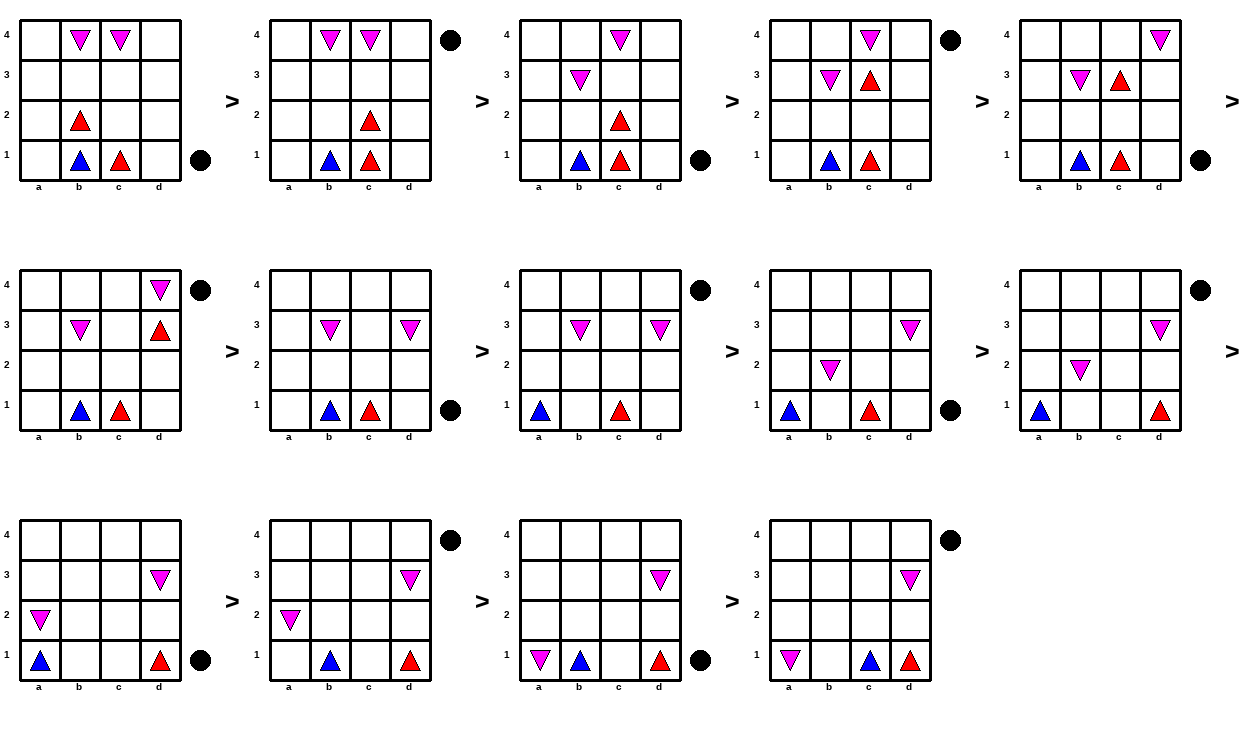

In [25]:
# @title BRR vs br でdrawを実現できない．
s = (1,((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 1, 2, 0)))
print(results_draw_det2br[0][s])
states = one_seq(s, results_draw_det2br)
print(states)
showstates(states)

-1
[(-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 1, 2, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 2, 0, 0), (0, 1, 2, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 2, 0), (0, 1, 2, 0))), (1, ((0, 0, -3, 0), (0, 0, 0, 0), (0, -3, 2, 0), (0, 1, 2, 0))), (-1, ((0, 0, -3, 0), (0, 0, 0, 0), (0, -3, 2, 0), (1, 0, 2, 0))), (1, ((0, 0, -3, 0), (0, 0, 0, 0), (0, 0, 2, 0), (1, -3, 2, 0))), (-1, ((0, 0, -3, 0), (0, 0, 0, 0), (1, 0, 2, 0), (0, -3, 2, 0))), (1, ((0, 0, -3, 0), (0, 0, 0, 0), (1, 0, 2, 0), (-3, 0, 2, 0))), (-1, ((0, 0, -3, 0), (0, 0, 0, 0), (0, 1, 2, 0), (-3, 0, 2, 0)))]


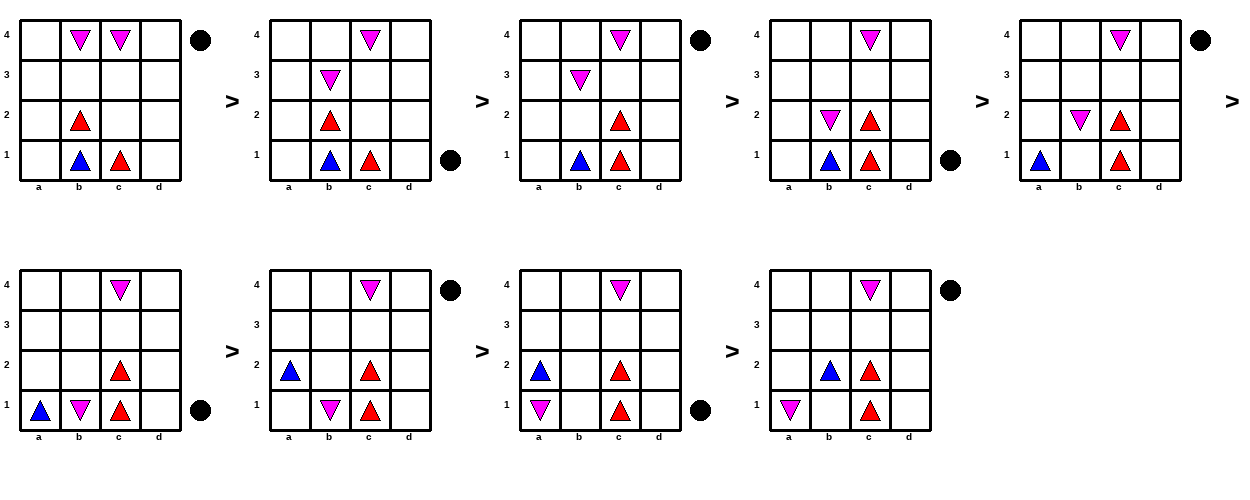

In [26]:
# @title BRR vs br でdrawを実現できない
s = (-1,((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 1, 2, 0)))
print(results_draw_det2br[0][s])
states = one_seq(s, results_draw_det2br)
print(states)
showstates(states)

1
[(1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 1, 1, 0)))]


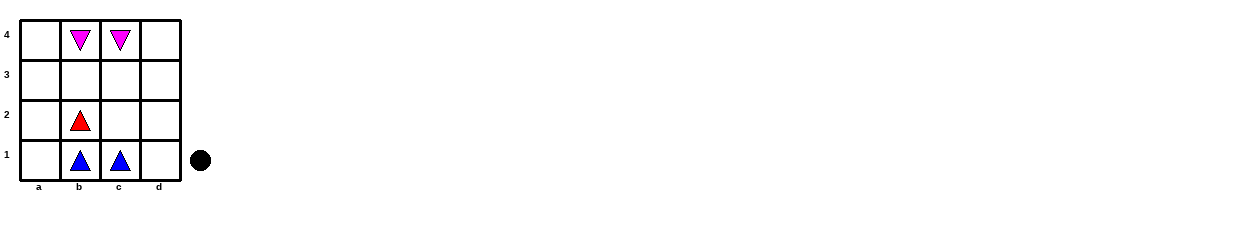

In [28]:
# @title BBR vs br でdraw
s = (1,((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 1, 1, 0)))
print(results_draw_det2br[0][s])
states = one_seq(s, results_draw_det2br)
print(states)
showstates(states)

# 自分の駒が紫2個，相手が紫駒2個でplayして利得1となる戦略(ミニガイスターの解析)



In [31]:
# is_final_win_br2br
# return value
# 1 : the state is final and player 1 can draw
# -1 : the state is final and player 1 can't draw
# 0 : the state is not final
from collections import Counter
from itertools import permutations
def is_final_win_br2br(state, results_win_det2br):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = Counter(board[y][x] for y in range(H) for x in range(W))
    assert len(mypieces) == 2 and len(oppieces) == 2
    assert pcounts[-3] == 2 and pcounts[3] == 2
    for myps in permutations(mypieces):
        new_board = tuple2board(board)
        new_board[myps[0][1]][myps[0][0]] = 1
        new_board[myps[1][1]][myps[1][0]] = 2
        new_state =  (turn, board2tuple(new_board))
        if results_win_det2br[0][new_state] != 1:
                return -1
    return 1

In [36]:
# @title 自分の駒が紫2個，相手が紫駒2個でplayして利得1
all_br2br = states_from_combination(4, 4, mycolorscomb=((3,3),), opcolorscomb=((-3, -3),))
results_win_br2br = ({}, {})
for s in all_br2br:
    if is_final_win_br2br(s, results_win_det2br) == 1:
        results_win_br2br[0][s] = 1
    else:
        results_win_br2br[0][s] = -1
    results_win_br2br[1][s] = 0
save_result(results_win_br2br, f'{dir}/results_win_br2br.pickle')

1
[(1, ((0, 0, 0, 0), (3, 0, 0, 3), (0, -3, -3, 0), (0, 0, 0, 0)))]


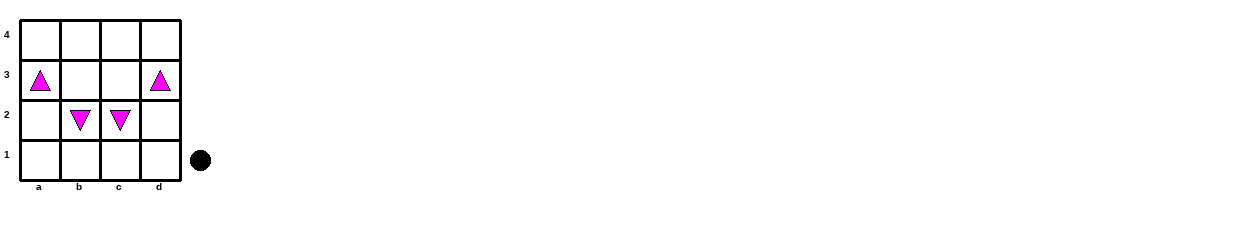

In [37]:
# @title どちらが青駒でも先に脱出可能
s = (1, ((0, 0, 0, 0), (3, 0, 0, 3), (0, -3, -3, 0), (0, 0, 0, 0)))
print(is_final_draw_br2br(s, results_win_det2br))
states = one_seq(s, results_win_br2br)
print(states)
showstates(states)

-1


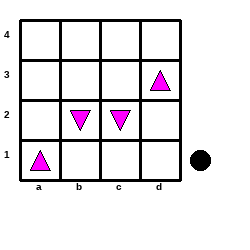

In [38]:
# @title 片方が青駒なら脱出可能だが，これは利得1ではない
s = (1, ((0, 0, 0, 0), (0, 0, 0, 3), (0, -3, -3, 0), (3, 0, 0, 0)))
print(results_win_br2br[0][s])
showstate(s)

# 自分の駒が紫2個，相手が紫駒2個でplayして利得0となる戦略(ミニガイスターの解析)

この観点での自分の(手番のプレイヤのではなく)勝ち局面は

- 自分の手番
 - 自分の紫駒が脱出ポイントにいる．
 - 相手の駒の赤青をサイコロで決めて，1/2の確率で当たったら，確実に勝てる．

負け局面は

- 相手の手番
 - 相手の青駒が脱出ポイントにいる．



In [40]:
# is_final_draw_br2br
# return value
# 1 : the state is final and player 1 can draw
# -1 : the state is final and player 1 can't draw
# 0 : the state is not final
from collections import Counter
from itertools import permutations
def is_final_draw_br2br(state, results_det):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = Counter(board[y][x] for y in range(H) for x in range(W))
    assert len(mypieces) == 2 and len(oppieces) == 2
    assert pcounts[-3] == 2 and pcounts[3] == 2
    if turn == 1:
        if board[0][0] == 3 or board[0][W - 1] == 3: # can escape
            return 1
        for myps in permutations(mypieces):
            for opps in permutations(oppieces):
                newboard = [list(row) for row in board]
                newboard[myps[0][1]][myps[0][0]] = 1
                newboard[myps[1][1]][myps[1][0]] = 2
                newboard[opps[0][1]][opps[0][0]] = -1
                newboard[opps[1][1]][opps[1][0]] = -2
                newstate =  (turn, tuple(tuple(row) for row in newboard))
                if results_det[0][newstate] != 1:
                    return 0
        return 1
    else:
        if board[H - 1][0] == -3 or board[H - 1][W - 1]== -3: # 相手番で脱出できるようなら負け
            return -1
    return 0

1


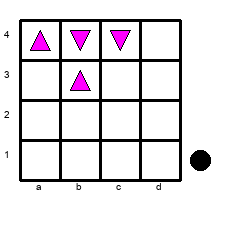

In [ ]:
# @title 片方の駒が脱出可能なので利得0達成
s = (1, ((3, -3, -3, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)))
print(is_final_draw_br2br(s, results_det))
showstate(s)

0


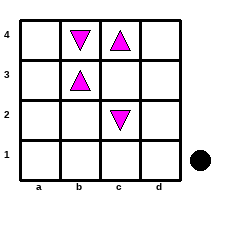

In [43]:
# @title 相手の1つの駒の取り方が複数
s = (1, ((0, -3, 3, 0), (0, 3, 0, 0), (0, 0, -3, 0), (0, 0, 0, 0)))
print(is_final_draw_br2br(s, results_det))
showstate(s)

1


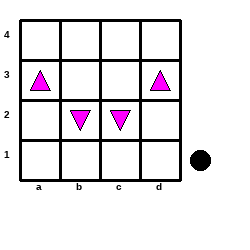

In [44]:
# @title 手数はかかるが，ここで確定させて勝てる．
s = (1, ((0, 0, 0, 0), (3, 0, 0, 3), (0, -3, -3, 0), (0, 0, 0, 0)))
print(is_final_draw_br2br(s, results_det))
showstate(s)

In [ ]:
# @title 後退解析の実行
all_br2br = states_from_combination(4, 4, mycolorscomb=((3,3),), opcolorscomb=((-3, -3),))
results_draw_br2br = rga(all_br2br, {s: is_final_draw_br2br(s, results_det) for s in all_br2br})
save_result(results_draw_br2br, f'{dir}/results_draw_br2br.pickle')


1
[(1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 3, 0, 0), (0, 0, 3, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 3, 0, 0), (0, 0, 3, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 3, 3, 0), (0, 0, 0, 0))), (1, ((0, 0, 0, -3), (0, -3, 0, 0), (0, 3, 3, 0), (0, 0, 0, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 0), (0, 3, 0, 3), (0, 0, 0, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 3, 0, 3), (0, 0, 0, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 3), (0, 3, 0, 0), (0, 0, 0, 0))), (1, ((0, -3, 0, 0), (0, -3, 0, 3), (0, 3, 0, 0), (0, 0, 0, 0))), (-1, ((0, -3, 0, 3), (0, -3, 0, 0), (0, 3, 0, 0), (0, 0, 0, 0))), (1, ((0, 0, -3, 3), (0, -3, 0, 0), (0, 3, 0, 0), (0, 0, 0, 0)))]


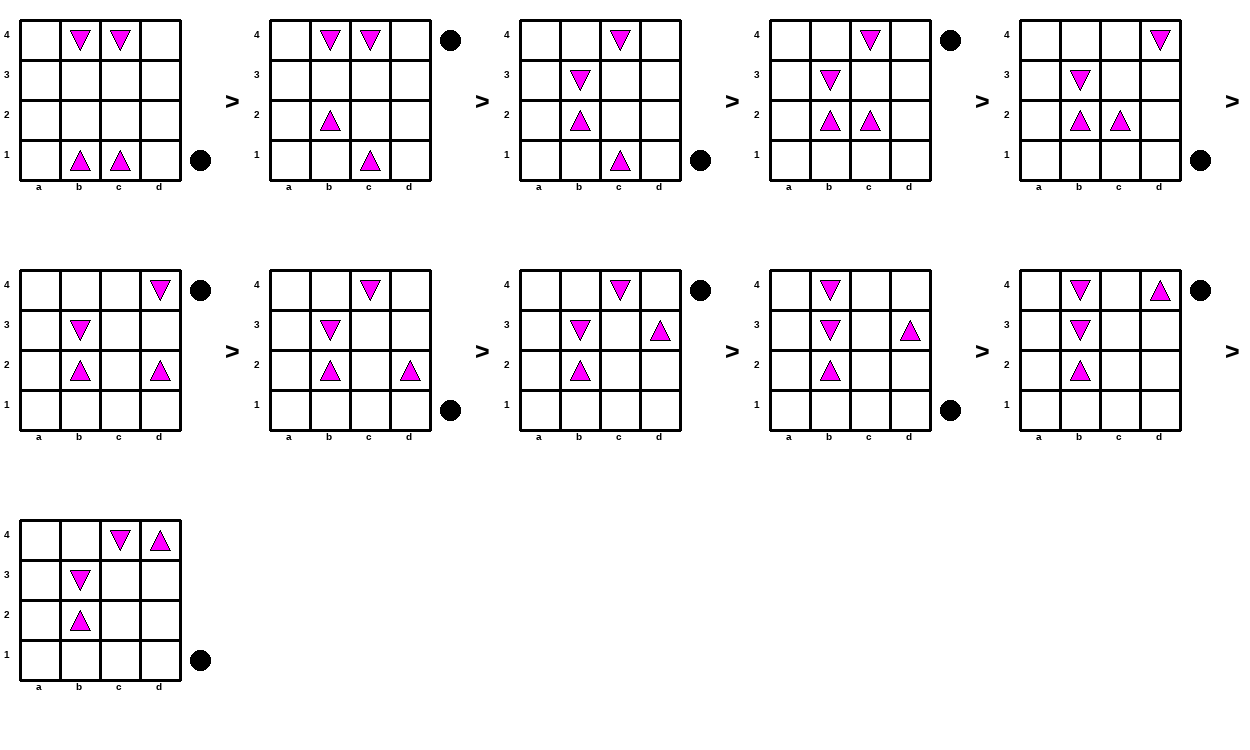

In [45]:
# @title 初期配置で平均利得0を達成可能(11手)
s = (1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0)))
print(results_draw_br2br[0][s])
states = one_seq(s, results_draw_br2br)
print(states)
showstates(states)

1
[(-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 3, 0, 0), (0, 0, 3, 0))), (1, ((0, 0, 0, -3), (0, -3, 0, 0), (0, 3, 0, 0), (0, 0, 3, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 0), (3, 0, 0, 0), (0, 0, 3, 0))), (1, ((0, 0, 0, -3), (-3, 0, 0, 0), (3, 0, 0, 0), (0, 0, 3, 0))), (-1, ((0, 0, 0, -3), (-3, 0, 0, 0), (3, 0, 0, 0), (0, 0, 0, 3))), (1, ((0, 0, 0, 0), (-3, 0, 0, -3), (3, 0, 0, 0), (0, 0, 0, 3))), (-1, ((0, 0, 0, 0), (-3, 0, 0, -3), (3, 0, 0, 3), (0, 0, 0, 0))), (1, ((-3, 0, 0, 0), (0, 0, 0, -3), (3, 0, 0, 3), (0, 0, 0, 0))), (-1, ((-3, 0, 0, 0), (3, 0, 0, -3), (0, 0, 0, 3), (0, 0, 0, 0))), (1, ((-3, 0, 0, 0), (3, 0, -3, 0), (0, 0, 0, 3), (0, 0, 0, 0))), (-1, ((-3, 0, 0, 0), (3, 0, -3, 3), (0, 0, 0, 0), (0, 0, 0, 0))), (1, ((0, -3, 0, 0), (3, 0, -3, 3), (0, 0, 0, 0), (0, 0, 0, 0))), (-1, ((3, -3, 0, 0), (0, 0, -3, 3), (0, 0, 0, 0), (0, 0, 0, 0))), (1, ((3, 0, -3

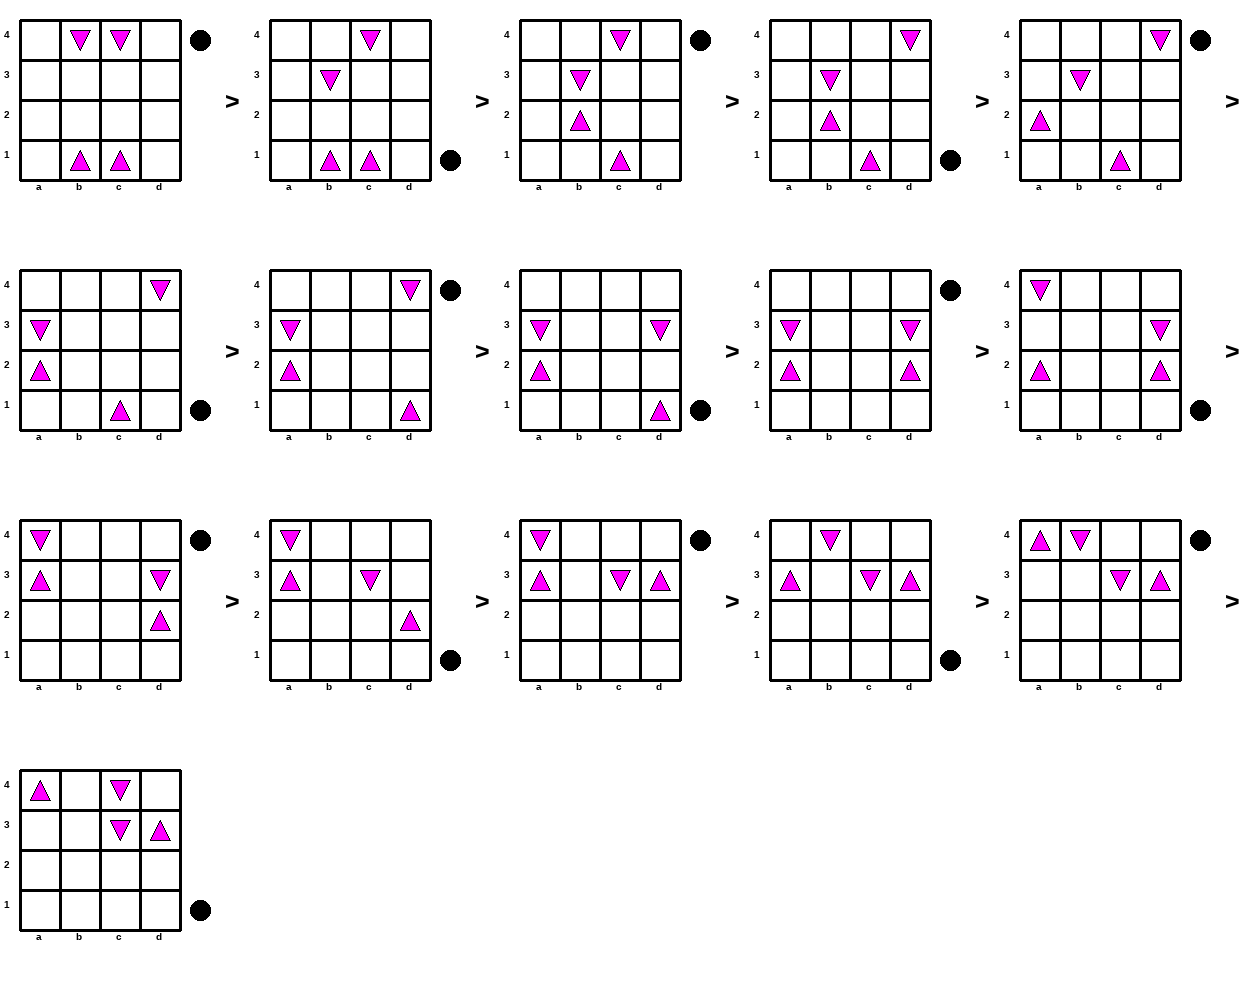

In [46]:
# @title 初期配置(相手番)で平均利得0を達成可能(16手)
s = (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0)))
print(results_draw_br2br[0][s])
states = one_seq(s, results_draw_br2br)
print(states)
showstates(states)

プレイヤ1も，プレイヤ2も有限手数で引き分けにできるので，ナッシュ均衡における平均利得は0

# 3駒対2駒

# 3駒側が青赤赤
双方のナッシュ均衡戦略を作成可能で，利得0
## Rbr vs br で利得0を目指す．
Rbr と br とする．
自分の(手番のプレイヤのではなく)勝ち局面は
- 自分の手番
 - 自分の駒が脱出ポイントにいる．
 - 相手の駒の色を決めつけた時にどちらでも勝ち

負け局面は
- 相手の手番
 - 相手の紫駒が脱出ポイントにいる．
 - 相手の駒が自分の赤駒を取った時に負け
 - 相手の駒が自分の紫駒を取ったった時に確定した赤青駒の局面が自分の勝ちではない．

In [47]:
# @title is_final_draw_Rbr2br
# return value
# 1 : the state is final and player 1 can draw
# -1 : the state is final and player 1 can't draw
# 0 : the state is not final
from collections import Counter
from itertools import permutations
def is_final_draw_Rbr2br(state, results_det, results_draw_br2br, results_win_det2br):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = Counter(board[y][x] for y in range(H) for x in range(W))
    assert len(mypieces) == 3 and len(oppieces) == 2
    assert pcounts[3] == 2 and pcounts[2] == 1 and pcounts[-3] == 2
    myred = [p for p in mypieces if board[p[1]][p[0]] == 2]
    mypurple = [p for p in mypieces if board[p[1]][p[0]] == 3]
    if turn == 1:
        if board[0][0] == 3 or board[0][W - 1] == 3: # can escape
            return 1
        for myps in permutations(mypurple):
            for opps in permutations(oppieces):
                newboard = [list(row) for row in board]
                newboard[myps[0][1]][myps[0][0]] = 1
                newboard[myps[1][1]][myps[1][0]] = 2
                newboard[opps[0][1]][opps[0][0]] = -1
                newboard[opps[1][1]][opps[1][0]] = -2
                newstate =  (turn, tuple(tuple(row) for row in newboard))
                if results_det[0][newstate] != 1:
                    return 0
            return 1
        return 0
    else:
        if board[H - 1][0] == -3 or board[H - 1][W - 1]== -3: # 相手番で脱出できるようなら負け
            return -1
        # capture red
        for opp in nextpos(myred[0], H, W):
            if board[opp[1]][opp[0]] != -3:
                continue
            newboard = [list(row) for row in board]
            newboard[myred[0][1]][myred[0][0]] = -3
            newboard[opp[1]][opp[0]] = 0
            newstate =  (-turn, tuple(tuple(row) for row in newboard))
            if results_draw_br2br[0][newstate] == -1:
                return -1
        # capture purple
        for i, myp in enumerate(mypurple):
            for opp in nextpos(myp, H, W):
                if board[opp[1]][opp[0]] != -3:
                    continue
                newboard = [list(row) for row in board]
                newboard[myp[1]][myp[0]] = -3
                newboard[opp[1]][opp[0]] = 0
                myo = mypurple[1 - i]
                newboard[myo[1]][myo[0]] = 1 # blue
                newstate =  (-turn, tuple(tuple(row) for row in newboard))
                if results_win_det2br[0][newstate] != 1:
                    return -1
        return 0

In [ ]:
# @title 後退解析の実行
all_Rbr2br = states_from_combination(4, 4, mycolorscomb=((3, 3, 2),), opcolorscomb=((-3, -3),))
results_draw_Rbr2br = rga(all_Rbr2br, {s: is_final_draw_Rbr2br(s, results_det, results_draw_br2br) for s in all_Rbr2br})
save_result(results_draw_Rbr2br, f'{dir}/results_drwa_Rbr2br.pickle')

0
[(1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 3, 3, 0))), (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 2, 0), (0, 3, 3, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 2, 0), (0, 3, 3, 0))), (-1, ((0, 0, -3, 0), (0, -3, 2, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (1, ((0, 0, 0, -3), (0, -3, 2, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 2), (0, 0, 0, 0), (0, 3, 3, 0))), (1, ((0, 0, 0, -3), (-3, 0, 0, 2), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, 0, 0, -3), (-3, 0, 0, 2), (0, 0, 3, 0), (0, 3, 0, 0))), (1, ((0, 0, 0, -3), (0, 0, 0, 2), (-3, 0, 3, 0), (0, 3, 0, 0))), (-1, ((0, 0, 0, -3), (0, 0, 0, 2), (-3, 0, 0, 3), (0, 3, 0, 0))), (1, ((0, 0, -3, 0), (0, 0, 0, 2), (-3, 0, 0, 3), (0, 3, 0, 0))), (-1, ((0, 0, -3, 0), (0, 0, 2, 0), (-3, 0, 0, 3), (0, 3, 0, 0))), (1, ((0, 0, 0, -3), (0, 0, 2, 0), (-3, 0, 0, 3), (0, 3, 0, 0)))]


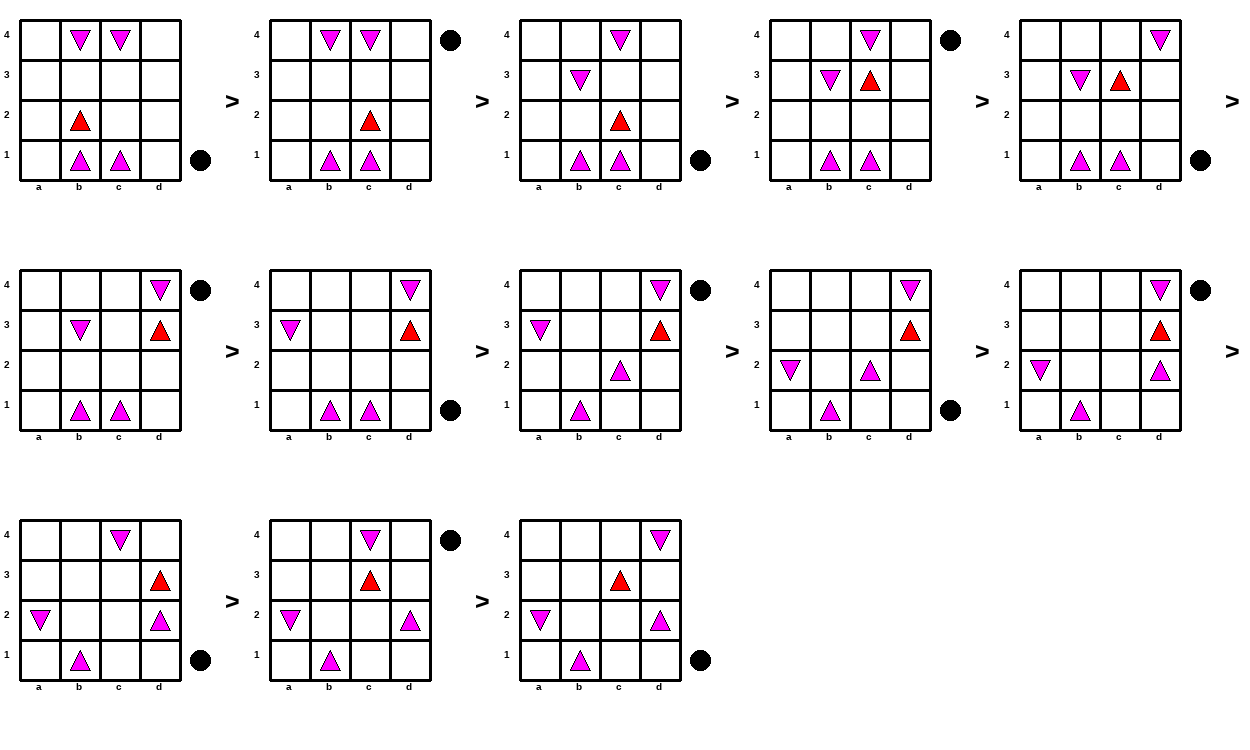

In [50]:
# @title 初期配置先手番は千日手
s = (1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 3, 3, 0)))
print(results_draw_Rbr2br[0][s])
states = one_seq(s, results_draw_Rbr2br)
print(states)
showstates(states)

この結果によると，引き分けにできるようだ．
手番を変えてみる．

0
[(-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 3, 3, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 2, 0, 0), (0, 3, 3, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 2, 0, 0), (3, 0, 3, 0))), (1, ((0, 0, 0, -3), (0, -3, 0, 0), (0, 2, 0, 0), (3, 0, 3, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 0), (0, 2, 3, 0), (3, 0, 0, 0))), (1, ((0, 0, 0, -3), (-3, 0, 0, 0), (0, 2, 3, 0), (3, 0, 0, 0))), (-1, ((0, 0, 0, -3), (-3, 0, 0, 0), (2, 0, 3, 0), (3, 0, 0, 0))), (1, ((0, 0, 0, 0), (-3, 0, 0, -3), (2, 0, 3, 0), (3, 0, 0, 0))), (-1, ((0, 0, 0, 0), (-3, 0, 0, -3), (2, 0, 3, 0), (0, 3, 0, 0))), (1, ((0, 0, 0, -3), (-3, 0, 0, 0), (2, 0, 3, 0), (0, 3, 0, 0))), (-1, ((0, 0, 0, -3), (-3, 0, 0, 0), (2, 0, 0, 3), (0, 3, 0, 0))), (1, ((0, 0, -3, 0), (-3, 0, 0, 0), (2, 0, 0, 3), (0, 3, 0, 0))), (-1, ((0, 0, -3, 0), (-3, 0, 0, 0), (2, 0, 0, 3), (3, 0, 0, 0))), (1, ((0, 0, 0, -3), (-3, 0, 0, 0), (2, 0, 0, 3), (3, 0, 0, 0))), (-1, ((0, 0, 0, -3), (-3, 0, 0, 0), (2, 0, 0, 0), (3, 0, 0, 3))), (1, ((0, 0, 0,

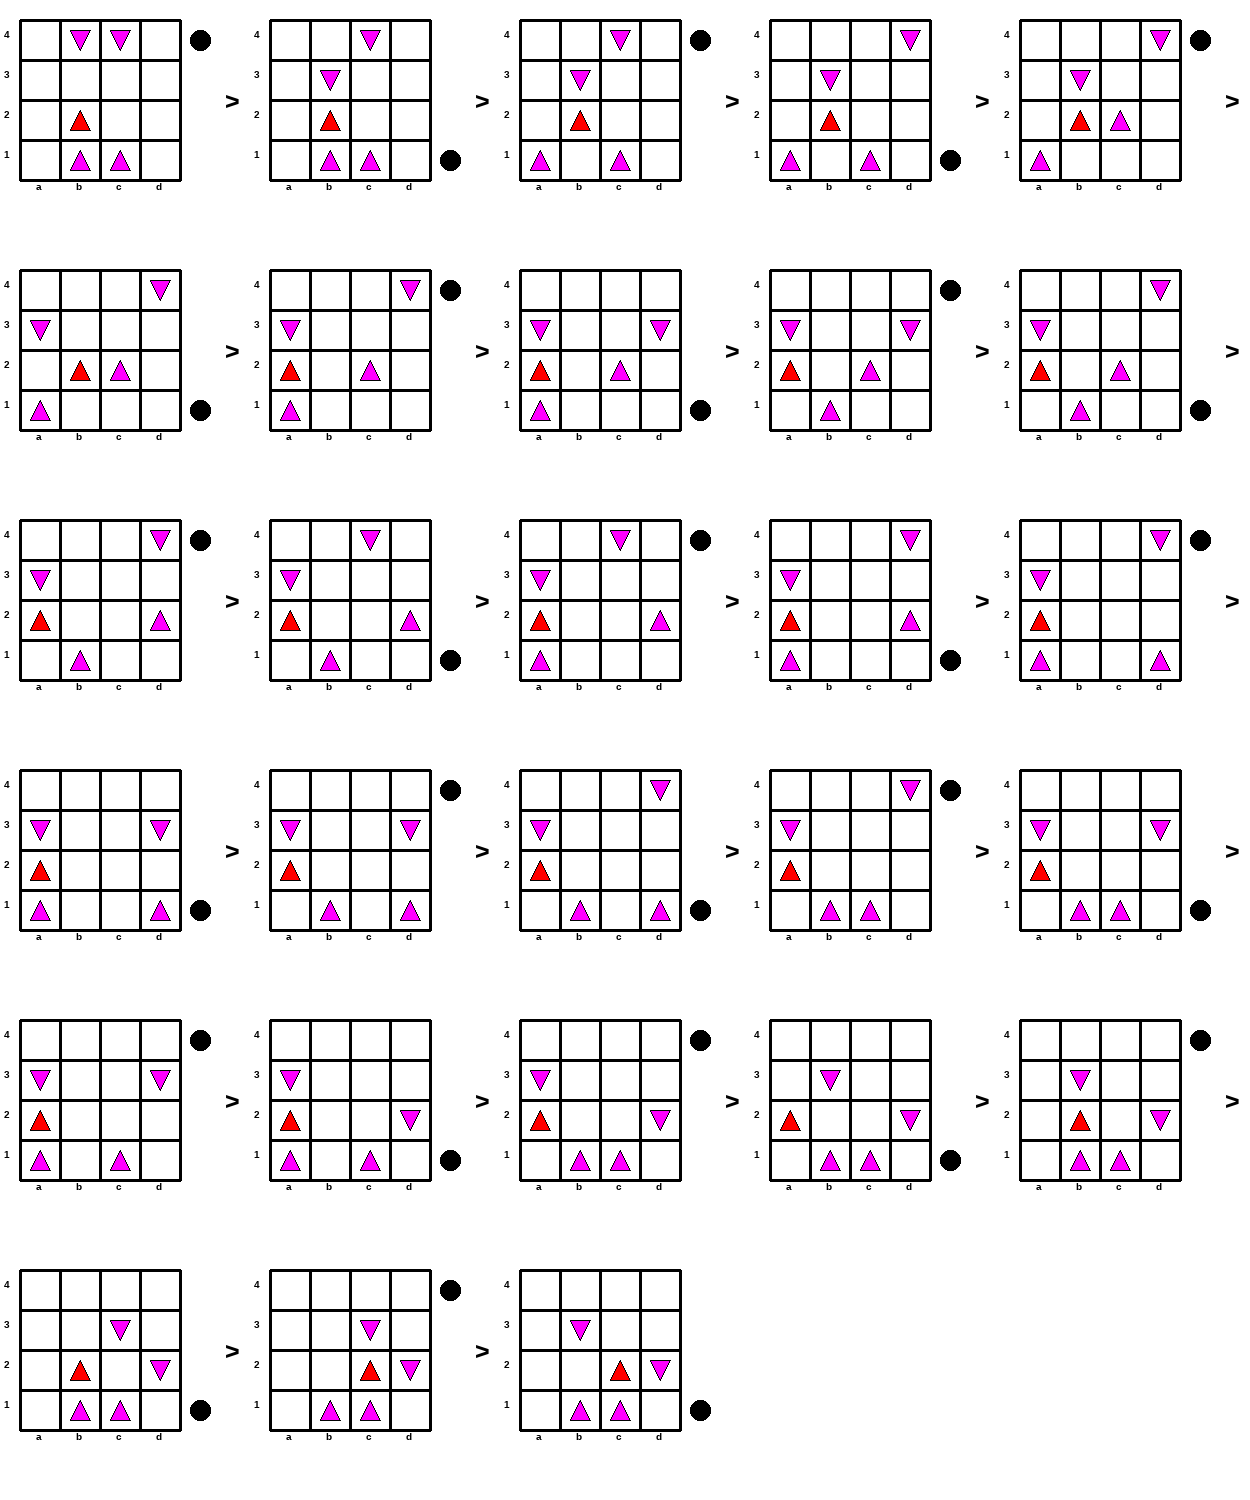

In [51]:
# @title 初期配置後手番も千日手
s = (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 2, 0, 0), (0, 3, 3, 0)))
print(results_draw_Rbr2br[0][s])
states = one_seq(s, results_draw_Rbr2br)
print(states)
showstates(states)

## br対brrで利得0を目指す
この観点での自分の(手番のプレイヤのではなく)勝ち局面は

自分の手番
自分の駒が脱出ポイントにいる．
相手の駒を取って，その駒が赤だとしても取った後はdraw
負け局面は

相手の手番
相手の紫駒が脱出ポイントにいる．

In [53]:
# @title is_final_draw_br2brr
# return value
# 1 : the state is final and player 1 can draw
# -1 : the state is final and player 1 can't draw
# 0 : the state is not final
from collections import Counter
from itertools import permutations
def is_final_draw_br2brr(state, results_draw_br2br):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = get_pcounts(board)
    assert len(mypieces) == 2 and len(oppieces) == 3
    assert pcounts[3] == 2 and pcounts[-3] == 3
    if turn == 1:
        if board[0][0] == 3 or board[0][W - 1] == 3: # can escape
            return 1
        for myp in mypieces:
            for opp in nextpos(myp, H, W):
                if board[opp[1]][opp[0]] != -3:
                    continue
                new_board = tuple2board(board)
                new_board[opp[1]][opp[0]] = board[myp[1]][myp[0]]
                new_board[myp[1]][myp[0]] = 0
                new_state = (-turn, board2tuple(new_board))
                if results_draw_br2br[0][new_state] >= 0:
                    return 1
        return 0
    else:
        if board[H - 1][0] == -3 or board[H - 1][W - 1]== -3: # 相手番で脱出できるようなら負け
            return -1
        return 0

In [ ]:
# @title 後退解析の実行
all_br2brr = states_from_combination(4, 4, mycolorscomb=((3,3),),
                                  opcolorscomb=((-3, -3, -3),))

results_draw_br2brr = rga(all_br2brr, {s: is_final_draw_br2brr(s, results_draw_br2br) for s in all_br2brr})
save_result(results_draw_br2brr, f'{dir}/results_draw_br2brr.pickle')

1
[(1, ((0, -3, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, -3, -3, 0), (0, -3, 0, 0), (0, 0, 3, 0), (0, 3, 0, 0))), (1, ((0, -3, 0, -3), (0, -3, 0, 0), (0, 0, 3, 0), (0, 3, 0, 0))), (-1, ((0, -3, 0, -3), (0, -3, 3, 0), (0, 0, 0, 0), (0, 3, 0, 0))), (1, ((0, -3, 0, -3), (-3, 0, 3, 0), (0, 0, 0, 0), (0, 3, 0, 0))), (-1, ((0, -3, 3, -3), (-3, 0, 0, 0), (0, 0, 0, 0), (0, 3, 0, 0))), (1, ((0, 0, 3, -3), (-3, -3, 0, 0), (0, 0, 0, 0), (0, 3, 0, 0)))]


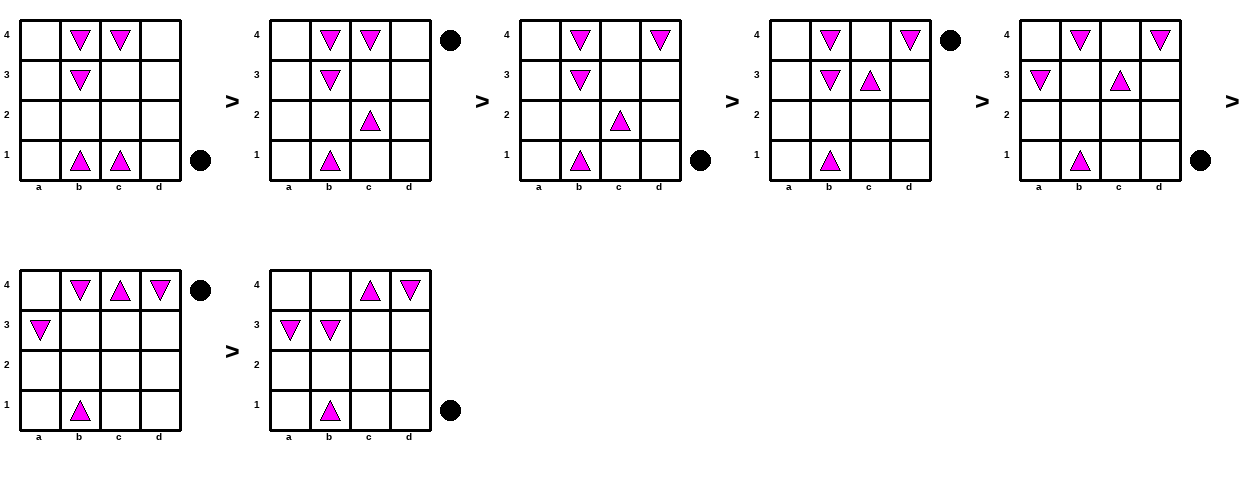

In [56]:
# @title 初期配置で平均利得0を達成可能(先手番)
s = (1, ((0, -3, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0)))
print(results_draw_br2brr[0][s])
states = one_seq(s, results_draw_br2brr)
print(states)
showstates(states)

1
[(-1, ((0, -3, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (1, ((0, -3, 0, -3), (0, -3, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, -3, 0, -3), (0, -3, 0, 0), (0, 0, 0, 0), (3, 0, 3, 0))), (1, ((0, 0, -3, -3), (0, -3, 0, 0), (0, 0, 0, 0), (3, 0, 3, 0))), (-1, ((0, 0, -3, -3), (0, -3, 0, 0), (3, 0, 0, 0), (0, 0, 3, 0))), (1, ((0, 0, 0, -3), (0, -3, -3, 0), (3, 0, 0, 0), (0, 0, 3, 0))), (-1, ((0, 0, 0, -3), (3, -3, -3, 0), (0, 0, 0, 0), (0, 0, 3, 0))), (1, ((0, 0, 0, -3), (3, 0, -3, 0), (0, -3, 0, 0), (0, 0, 3, 0))), (-1, ((3, 0, 0, -3), (0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 3, 0))), (1, ((3, 0, 0, 0), (0, 0, -3, -3), (0, -3, 0, 0), (0, 0, 3, 0)))]


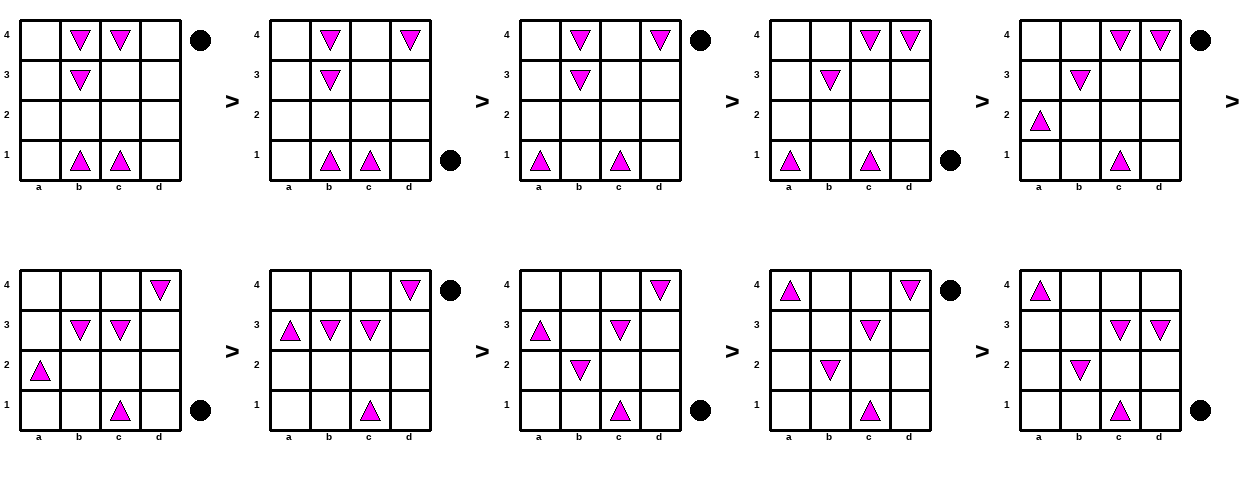

In [57]:
# @title 初期配置で平均利得0を達成可能(後手番)
s = (-1, ((0, -3, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0)))
print(results_draw_br2brr[0][s])
states = one_seq(s, results_draw_br2brr)
print(states)
showstates(states)

## まとめ
青赤赤 vs 2駒でナッシュ均衡戦略を作成可能で，平均利得は0

# 青青赤 vs 2駒の平均利得は 3駒側からみて 1/3 以上 1/2 以下



# bbr対brで利得1/3を目指す

この観点での自分の(手番のプレイヤのではなく)勝ち局面は
- 自分の手番
 - 自分の紫駒が脱出ポイントにいる．

負け局面は
- 相手の手番
 - 相手の青駒が脱出ポイントにいる．
 - 相手が自分の紫駒を取って，それが利得-1


In [ ]:
# is_final_r03_bbr2br
# return value
# 1 : the state is final and player 1 can draw
# -1 : the state is final and player 1 can't draw
# 0 : the state is not final
from collections import Counter
from itertools import permutations
def is_final_r03_bbr2br(state, results_draw_br2br):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = Counter(board[y][x] for y in range(H) for x in range(W))
    assert len(mypieces) == 3 and len(oppieces) == 2
    assert pcounts[-3] == 2 and pcounts[3] == 3
    if turn == 1:
        if board[0][0] == 3 or board[0][W - 1] == 3: # can escape
            return 1
        return 0
    else:
        if board[H - 1][0] == -3 or board[H - 1][W - 1]== -3: # 相手番で脱出できるようなら負け
            return -1
        for opp in oppieces:
            for p in nextpos(opp,H,W):
                v = board[p[1]][p[0]]
                if v == 3:
                    newboard = [list(row) for row in board]
                    newboard[p[1]][p[0]] = board[opp[1]][opp[0]]
                    newboard[opp[1]][opp[0]] = 0
                    newstate = (-turn, tuple(tuple(row) for row in newboard))
                    if results_draw_br2br[0][newstate] == -1:
                        return -1
    return 0

In [ ]:
all_bbr2br = states_from_combination(4, 4, mycolorscomb=((3,3,3),), opcolorscomb=((-3, -3),))
results_r03_bbr2br = rga(all_bbr2br, {s: is_final_r03_bbr2br(s, results_draw_br2br) for s in all_bbr2br})
save_result(results_r03_bbr2br, f'{dir}/results_r03_bbr2br.pickle')

1
[(1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 3, 0), (0, 3, 3, 0))), (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 0, 3), (0, 3, 3, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 0, 3), (0, 3, 3, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 3), (0, 0, 0, 0), (0, 3, 3, 0))), (1, ((0, 0, 0, -3), (0, -3, 0, 3), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 3), (0, 3, 0, 0), (0, 0, 3, 0))), (1, ((0, 0, 0, -3), (0, 0, -3, 3), (0, 3, 0, 0), (0, 0, 3, 0))), (-1, ((0, 0, 0, -3), (0, 0, -3, 3), (3, 0, 0, 0), (0, 0, 3, 0))), (1, ((0, 0, 0, -3), (0, 0, 0, 3), (3, 0, -3, 0), (0, 0, 3, 0))), (-1, ((0, 0, 0, -3), (3, 0, 0, 3), (0, 0, -3, 0), (0, 0, 3, 0))), (1, ((0, 0, -3, 0), (3, 0, 0, 3), (0, 0, -3, 0), (0, 0, 3, 0))), (-1, ((3, 0, -3, 0), (0, 0, 0, 3), (0, 0, -3, 0), (0, 0, 3, 0))), (1, ((3, 0, 0, -3), (0, 0, 0, 3), (0, 0, -3, 0), (0, 0, 3, 0)))]


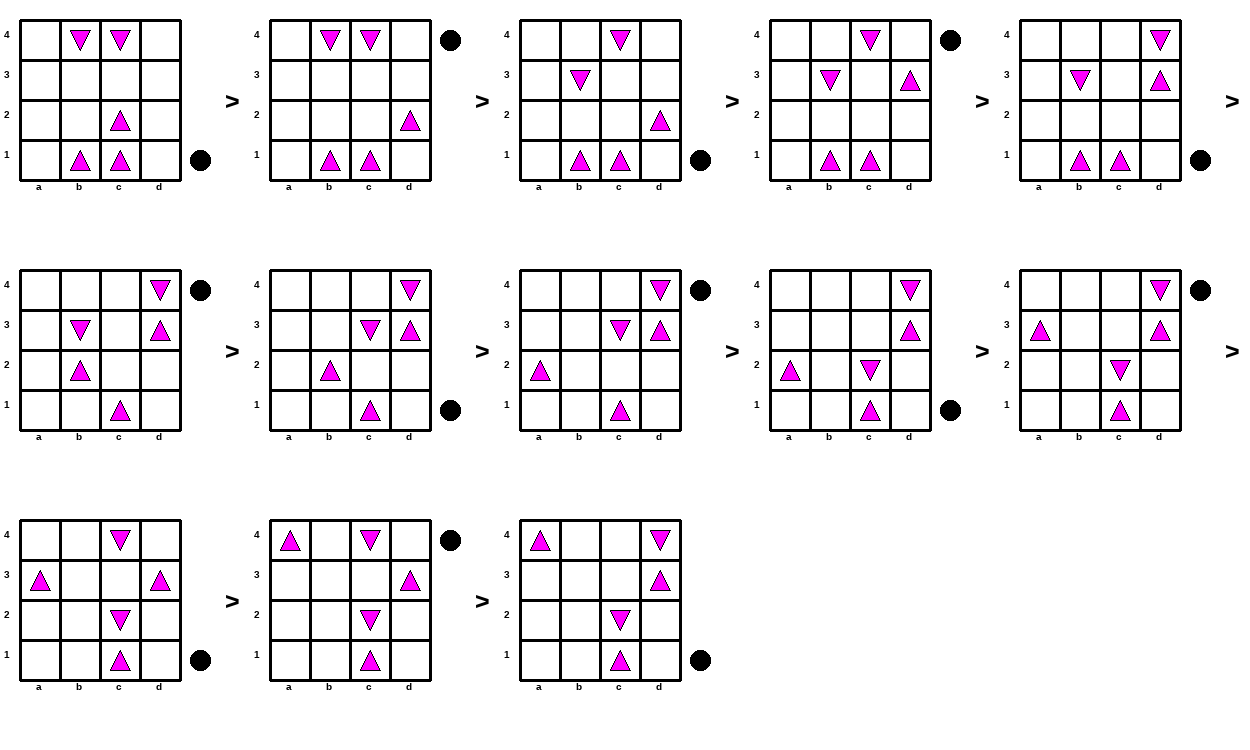

In [62]:
# @title 初期配置(先手番)で利得1/3を達成可能
s = (1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 3, 0), (0, 3, 3, 0)))
print(results_r03_bbr2br[0][s])
states = one_seq(s, results_r03_bbr2br)
print(states)
showstates(states)

1
[(-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 3, 0), (0, 3, 3, 0))), (1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 0, 3, 0), (0, 3, 3, 0))), (-1, ((0, 0, -3, 0), (0, -3, 0, 0), (0, 3, 0, 0), (0, 3, 3, 0))), (1, ((0, 0, 0, -3), (0, -3, 0, 0), (0, 3, 0, 0), (0, 3, 3, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 0), (3, 0, 0, 0), (0, 3, 3, 0))), (1, ((0, 0, 0, -3), (-3, 0, 0, 0), (3, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, 0, 0, -3), (-3, 0, 0, 0), (3, 0, 0, 0), (0, 3, 0, 3))), (1, ((0, 0, 0, 0), (-3, 0, 0, -3), (3, 0, 0, 0), (0, 3, 0, 3))), (-1, ((0, 0, 0, 0), (-3, 0, 0, -3), (3, 0, 0, 3), (0, 3, 0, 0))), (1, ((-3, 0, 0, 0), (0, 0, 0, -3), (3, 0, 0, 3), (0, 3, 0, 0))), (-1, ((-3, 0, 0, 0), (3, 0, 0, -3), (0, 0, 0, 3), (0, 3, 0, 0))), (1, ((-3, 0, 0, 0), (3, 0, -3, 0), (0, 0, 0, 3), (0, 3, 0, 0))), (-1, ((-3, 0, 0, 0), (3, 0, -3, 3), (0, 0, 0, 0), (0, 3, 0, 0))), (1, ((0, -3, 0, 0), (3, 0, -3, 3), (0, 0, 0, 0), (0, 3, 0, 0))), (-1, ((3, -3, 0, 0), (0, 0, -3, 3), (0, 0, 0, 0), (0, 3, 0, 0))), (1, ((3, 0, -3

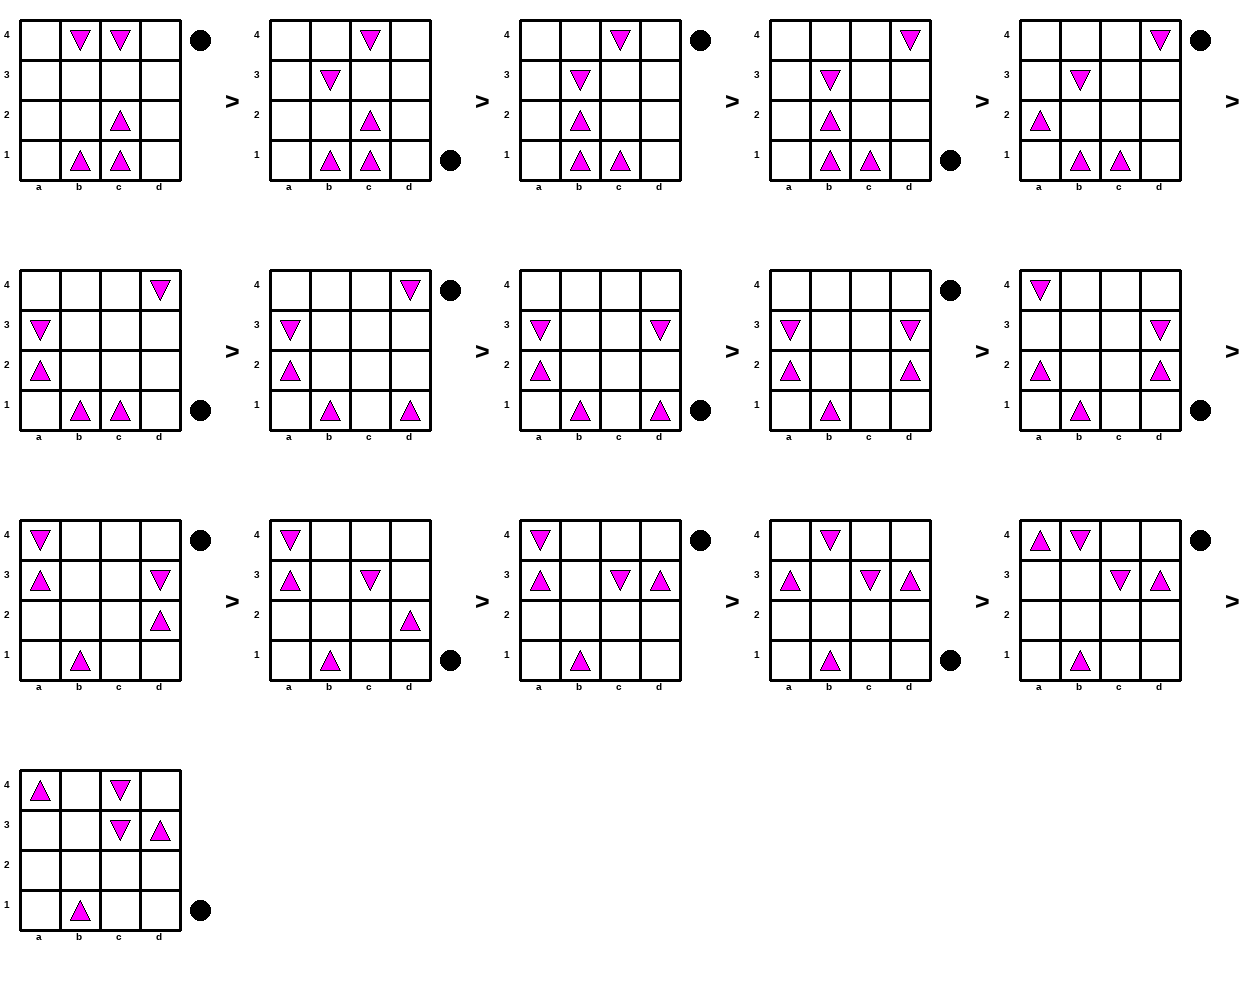

In [64]:
# @title 初期配置(後手手番)で利得1/3を達成可能
s = (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, 0, 3, 0), (0, 3, 3, 0)))
print(results_r03_bbr2br[0][s])
states = one_seq(s, results_r03_bbr2br)
print(states)
showstates(states)

# br対bbrで利得-1/2を目指す

この観点での自分の(手番のプレイヤのではなく)勝ち局面は
- 自分の手番
 - 自分の紫駒が脱出ポイントにいる．
 - 相手の駒を2つ取ることができて，それが青だったときは，br2brでdraw可能なら勝ち配置?

負け局面は
- 相手の手番
 - 相手の紫駒が脱出ポイントにいる．

In [ ]:
# is_final_rm05_br2bbr
# return value
# 1 : the state is final and player 1 can achieve -1/3
# -1 : the state is final and player 1 can't achieve -1/3
# 0 : the state is not final
from collections import Counter
from itertools import permutations
def is_final_rm05_br2bbr(state, results_draw_br2br):
    turn, board = state
    H, W = len(state[1]), len(state[1][0])
    mypieces, oppieces = get_pieces(board)
    pcounts = Counter(board[y][x] for y in range(H) for x in range(W))
    assert len(mypieces) == 2 and len(oppieces) == 3
    assert pcounts[3] == 2 and pcounts[-3] == 3
    if turn == 1:
        if board[0][0] == 3 or board[0][W - 1] == 3: # can escape
            return 1
        drawcount = 0
        for opp in oppieces:
            for nxt in nextpos(opp, H, W):
                if board[nxt[1]][nxt[0]] == 3:
                    newboard = [list(row) for row in board]
                    newboard[opp[1]][opp[0]] = 3
                    newboard[nxt[1]][nxt[0]] = 0
                    newstate =  (-turn, tuple(tuple(row) for row in newboard))
                    if results_draw_br2br[0][newstate] >= 0:
                        drawcount += 1
        if drawcount >= 2:
                return 1
        return 0
    else:
        if board[H - 1][0] == -3 or board[H - 1][W - 1]== -3: # 相手番で脱出できるようなら負け
            return -1
    return 0

In [ ]:
all_br2bbr = states_from_combination(4, 4, mycolorscomb=((3,3),), opcolorscomb=((-3, -3, -3),))
results_rm05_br2bbr = rga(all_br2bbr, {s: is_final_rm05_br2bbr(s, results_det) for s in all_br2bbr})
save_result(results_rm05_br2bbr, f'{dir}/results_rm05_br2bbr.pickle')

0
[(1, ((0, -3, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, -3, -3, 0), (0, -3, 0, 0), (0, 0, 3, 0), (0, 3, 0, 0))), (1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, -3, 3, 0), (0, 3, 0, 0))), (-1, ((0, -3, -3, 0), (0, 0, 0, 0), (0, -3, 0, 3), (0, 3, 0, 0))), (1, ((0, -3, 0, -3), (0, 0, 0, 0), (0, -3, 0, 3), (0, 3, 0, 0))), (-1, ((0, -3, 0, -3), (0, 0, 0, 3), (0, -3, 0, 0), (0, 3, 0, 0))), (1, ((0, -3, 0, -3), (0, 0, 0, 3), (0, 0, -3, 0), (0, 3, 0, 0))), (-1, ((0, -3, 0, -3), (0, 0, 0, 0), (0, 0, -3, 3), (0, 3, 0, 0))), (1, ((0, 0, 0, -3), (0, -3, 0, 0), (0, 0, -3, 3), (0, 3, 0, 0))), (-1, ((0, 0, 0, -3), (0, -3, 0, 3), (0, 0, -3, 0), (0, 3, 0, 0))), (1, ((0, 0, 0, -3), (0, 0, 0, 3), (0, -3, -3, 0), (0, 3, 0, 0))), (-1, ((0, 0, 0, -3), (0, 0, 0, 0), (0, -3, -3, 3), (0, 3, 0, 0))), (1, ((0, 0, 0, -3), (0, 0, 0, 0), (-3, 0, -3, 3), (0, 3, 0, 0))), (-1, ((0, 0, 0, -3), (0, 0, 0, 0), (-3, 0, -3, 3), (3, 0, 0, 0))), (1, ((0, 0, 0, -3), (0, 0, 0, 0), (-3, 0, 0, 3), (3, 0, -3, 0))), 

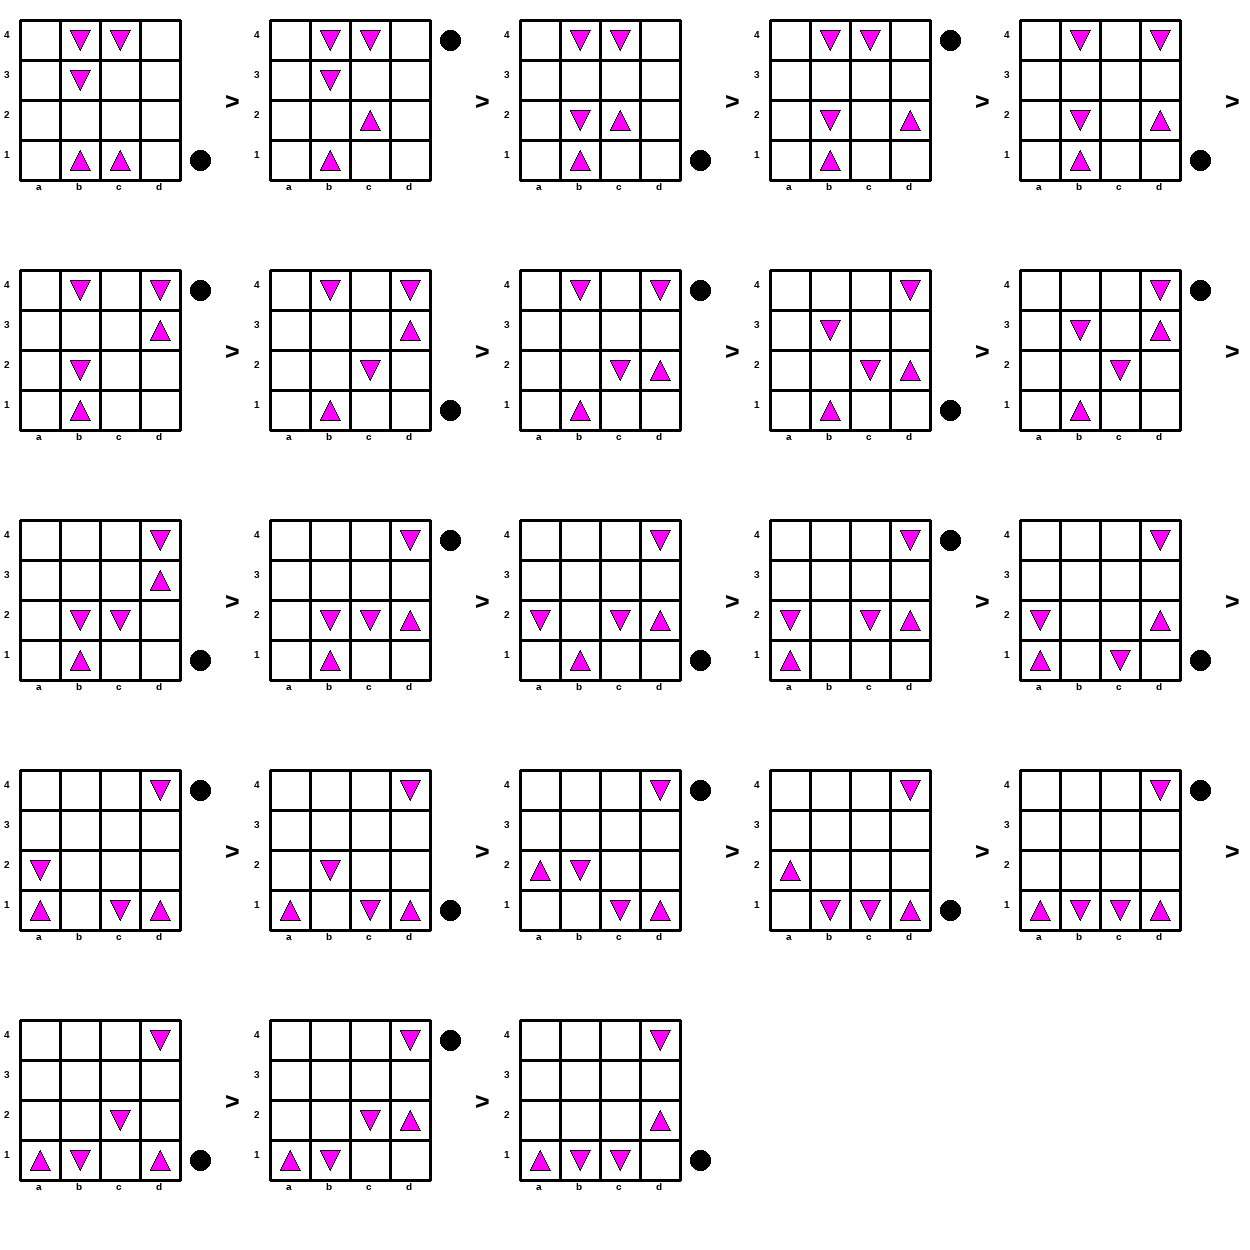

In [67]:
# @title 初期配置(先手番)で千日手可能
s = (1, ((0,-3,-3,0),(0,-3,0,0),(0,0,0,0),(0,3,3,0)))
print(results_rm05_br2bbr[0][s])
states = one_seq(s, results_rm05_br2bbr)
print(states)
showstates(states)

0
[(-1, ((0, -3, -3, 0), (0, -3, 0, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (1, ((0, -3, 0, 0), (0, -3, -3, 0), (0, 0, 0, 0), (0, 3, 3, 0))), (-1, ((0, -3, 0, 0), (0, -3, -3, 0), (0, 0, 3, 0), (0, 3, 0, 0))), (1, ((-3, 0, 0, 0), (0, -3, -3, 0), (0, 0, 3, 0), (0, 3, 0, 0))), (-1, ((-3, 0, 0, 0), (0, -3, -3, 0), (0, 0, 0, 3), (0, 3, 0, 0))), (1, ((-3, 0, 0, 0), (0, -3, 0, -3), (0, 0, 0, 3), (0, 3, 0, 0))), (-1, ((-3, 0, 0, 0), (0, -3, 0, -3), (0, 0, 0, 3), (3, 0, 0, 0))), (1, ((-3, 0, 0, 0), (0, 0, -3, -3), (0, 0, 0, 3), (3, 0, 0, 0))), (-1, ((-3, 0, 0, 0), (0, 0, -3, -3), (0, 0, 0, 3), (0, 3, 0, 0))), (1, ((0, 0, 0, 0), (-3, 0, -3, -3), (0, 0, 0, 3), (0, 3, 0, 0))), (-1, ((0, 0, 0, 0), (-3, 0, -3, -3), (0, 0, 0, 3), (3, 0, 0, 0))), (1, ((0, 0, 0, 0), (-3, 0, 0, -3), (0, 0, -3, 3), (3, 0, 0, 0))), (-1, ((0, 0, 0, 0), (-3, 0, 0, -3), (0, 0, -3, 3), (0, 3, 0, 0))), (1, ((0, 0, 0, 0), (0, 0, 0, -3), (-3, 0, -3, 3), (0, 3, 0, 0))), (-1, ((0, 0, 0, 0), (0, 0, 0, -3), (-3, 0, -3, 3), (3, 0, 0, 0))),

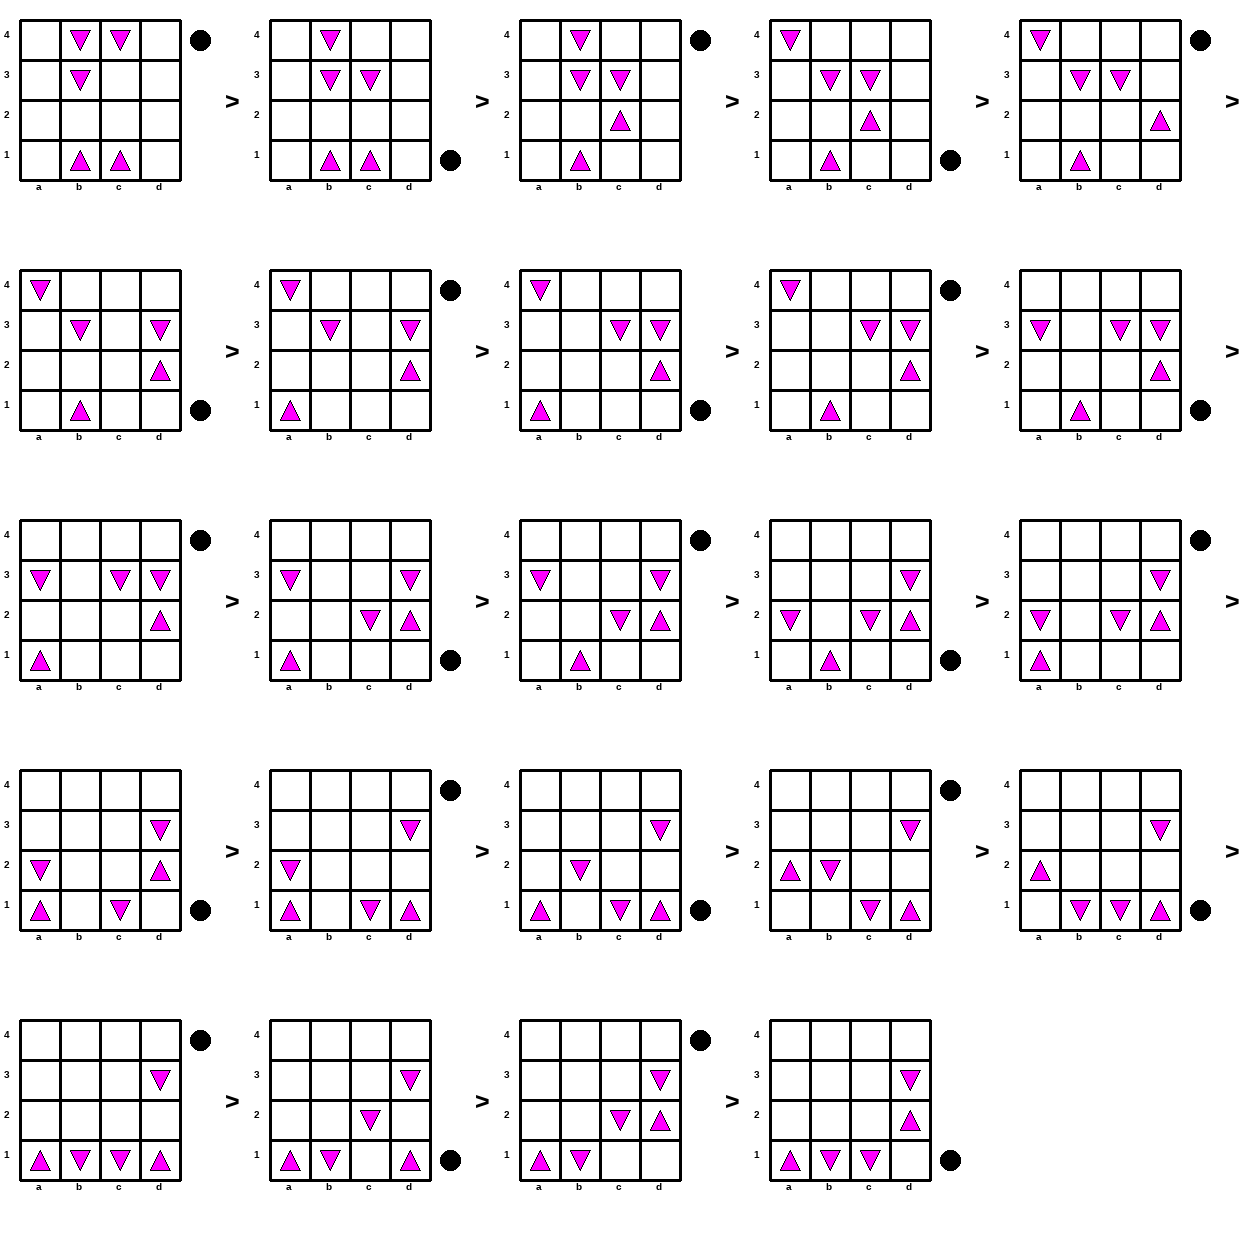

In [68]:
# @title 初期配置(後手番)で千日手可能
s = (-1, ((0,-3,-3,0),(0,-3,0,0),(0,0,0,0),(0,3,3,0)))
print(results_rm05_br2bbr[0][s])
states = one_seq(s, results_rm05_br2bbr)
print(states)
showstates(states)

以上の結果より，bbr対brのナッシュ均衡解が存在するとしたら，3駒側からみて，1/3以上1/2 以下であることが言える．
